In [ ]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from data_sources.load_dataset import load_dataset
from data_sources.load_dataset import (
    INDICATORS_SELECTED,
    INDICATORS_AGRICULTURE,
    INDICATORS_ECONOMY,
    INDICATORS_HEALTH,
    ALL_INDICATORS,
    INDICATORS_YEARS_RANGE,
)

In [ ]:
electricity_access = "Access to electricity (% of population)"
arable_land = "Arable land (hectares per person)"
cereal_yield = "Cereal yield (kg per hectare)"

In [ ]:
df = load_dataset(ALL_INDICATORS)
df

Indicator Name       Access to electricity (% of population)  \
Year Country Name                                              
2000 Albania                                      100.000000   
     Angola                                        20.000000   
     Australia                                    100.000000   
     Azerbaijan                                    98.908222   
     Bangladesh                                    32.000000   
...                                                      ...   
2018 Tunisia                                       99.800000   
     Ukraine                                      100.000000   
     United Kingdom                               100.000000   
     United States                                100.000000   
     Uruguay                                       99.800000   

Indicator Name       Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Year Country Name                                                                    
2000 Albania                                                   19.0372               
     Angola                                                   196.6992               
     Australia                                                 17.9326               
     Azerbaijan                                                36.5066               
     Bangladesh                                               112.2538               
...                                                                ...               
2018 Tunisia                                                    7.8500               
     Ukraine                                                   23.0026               
     United Kingdom                                            12.6410               
     United States                                             18.5562               
     Uruguay                                                   58.2386               

Indicator Name       Age dependency ratio (% of working-age population)  \
Year Country Name                                                         
2000 Albania                                                 59.723586    
     Angola                                                  99.071186    
     Australia                                               49.714266    
     Azerbaijan                                              58.724180    
     Bangladesh                                              68.950665    
...                                                                ...    
2018 Tunisia                                                 48.116981    
     Ukraine                                                 47.595158    
     United Kingdom                                          56.430746    
     United States                                           52.710677    
     Uruguay                                                 54.852714    

Indicator Name       Agricultural land (% of land area)  \
Year Country Name                                         
2000 Albania                                  41.751825   
     Angola                                   37.668557   
     Australia                                59.288104   
     Azerbaijan                               57.386357   
     Bangladesh                               72.213260   
...                                                 ...   
2018 Tunisia                                  62.712410   
     Ukraine                                  71.330687   
     United Kingdom                           71.718520   
     United States                            44.363367   
     Uruguay                                  80.081705   

Indicator Name       Agriculture, forestry, and fishing, value added (% of GDP)  \
Year Country Name                                                                 
2000 Albania                                                 24.515412            
     Angola                                            

In [ ]:
df.columns.values

array(['Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)',
       'Arable land (hectares per person)',
       'Birth rate, crude (per 1,000 people)',
       'Cereal yield (kg per hectare)',
       'Crop production index (2014-2016 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
       'Employment in agriculture, male (% of male employment) (modeled ILO estimate)',
       'Exports of goods and services (% of GDP)',
       'Fertility rate, total (births per woman)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Food production index (2014-2016 = 100)',
       'Forest area (% of land a

In [ ]:
series = df[electricity_access].to_frame().reset_index()
series

Year    Country Name  Access to electricity (% of population)
0     2000         Albania                               100.000000
1     2000          Angola                                20.000000
2     2000       Australia                               100.000000
3     2000      Azerbaijan                                98.908222
4     2000      Bangladesh                                32.000000
...    ...             ...                                      ...
1496  2018         Tunisia                                99.800000
1497  2018         Ukraine                               100.000000
1498  2018  United Kingdom                               100.000000
1499  2018   United States                               100.000000
1500  2018         Uruguay                                99.800000

[1501 rows x 3 columns]

In [ ]:
pivoted = series.pivot(
    values="Access to electricity (% of population)",
    index="Year",
    columns="Country Name",
)
pivoted

Country Name  Albania     Angola  Australia  Azerbaijan  Bangladesh  Belarus  \
Year                                                                           
2000           100.00  20.000000      100.0   98.908222   32.000000    100.0   
2001           100.00  20.000000      100.0   98.623421   35.109272    100.0   
2002           100.00  26.383869      100.0  100.000000   37.881958    100.0   
2003           100.00  27.465635      100.0   98.977852   40.645180    100.0   
2004           100.00  28.536760      100.0   99.139694   40.600000    100.0   
2005           100.00  29.596224      100.0   99.289879   44.230000    100.0   
2006           100.00  30.646555      100.0   99.500000   50.525102    100.0   
2007           100.00  37.500000      100.0   99.568916   46.500000    100.0   
2008           100.00  38.490000      100.0   99.710106   54.331120    100.0   
2009           100.00  33.804184      100.0   99.860703   57.072460    100.0   
2010           100.00  34.879726      100.0   99.947060   55.260000    100.0   
2011           100.00  34.600000      100.0   99.900000   59.600000    100.0   
2012            99.90  37.101025      100.0  100.000000   65.413666    100.0   
2013           100.00  38.248993      100.0  100.000000   61.500000    100.0   
2014            99.95  32.000000      100.0  100.000000   62.400000    100.0   
2015            99.98  42.000000      100.0  100.000000   74.440079    100.0   
2016            99.89  41.797379      100.0  100.000000   75.920000    100.0   
2017            99.89  43.001610      100.0  100.000000   88.000000    100.0   
2018           100.00  45.290000      100.0  100.000000   91.800000    100.0   

Country Name  Belgium    Bolivia     Brazil  Bulgaria  ...  Sri Lanka  Sweden  \
Year                                                   ...                      
2000            100.0  69.963045  94.364006     100.0  ...  63.600000   100.0   
2001            100.0  69.258539  96.016528     100.0  ...  63.600000   100.0   
2002            100.0  63.996855  96.652996     100.0  ...  80.700000   100.0   
2003            100.0  72.300000  96.980098     100.0  ...  75.044029   100.0   
2004            100.0  76.044250  96.765107     100.0  ...  76.628090   100.0   
2005            100.0  68.288209  97.093513     100.0  ...  78.200485   100.0   
2006            100.0  76.211281  97.594314     100.0  ...  82.050000   100.0   
2007            100.0  80.156567  98.125382     100.0  ...  80.000000   100.0   
2008            100.0  84.674991  98.526625     100.0  ...  82.887352   100.0   
2009            100.0  86.765597  98.856938     100.0  ...  87.090000   100.0   
2010            100.0  88.312813  99.352173     100.0  ...  85.300000   100.0   
2011            100.0  88.335943  99.328691     100.0  ...  87.760000   100.0   
2012            100.0  90.387375  99.519494     100.0  ...  87.000000   100.0   
2013            100.0  89.505686  99.575151     100.0  ...  90.200000   100.0   
2014            100.0  90.038729  99.650247     100.0  ...  92.637703   100.0   
2015            100.0  91.522822  99.710902     100.0  ...  94.334770   100.0   
2016            100.0  91.800000  99.700000     100.0  ...  97.500000   100.0   
2017            100.0  91.800000  99.800000     100.0  ...  97.500000   100.0   
2018            100.0  92.800000  99.700000     100.0  ...  99.586861   100.0   

Country Name  Switzerland   Tanzania   Thailand  Tunisia     Ukraine  \
Year                                                                   
2000                100.0   9.056112  82.100000     94.8  100.000000   
2001                100.0   9.996444  90.453430     97.3  100.000000   
2002                100.0  10.928488  91.108299     97.8  100.000000   
2003                100.0  11.100000  91.753708     98.4  100.000000   
2004                100.0  11.400000  92.388474     99.0  100.000000   
2005                100.0  13.663281  93.011574     99.3   99.885562   
2006                100.0  14.554425  99.

<AxesSubplot:xlabel='Year'>

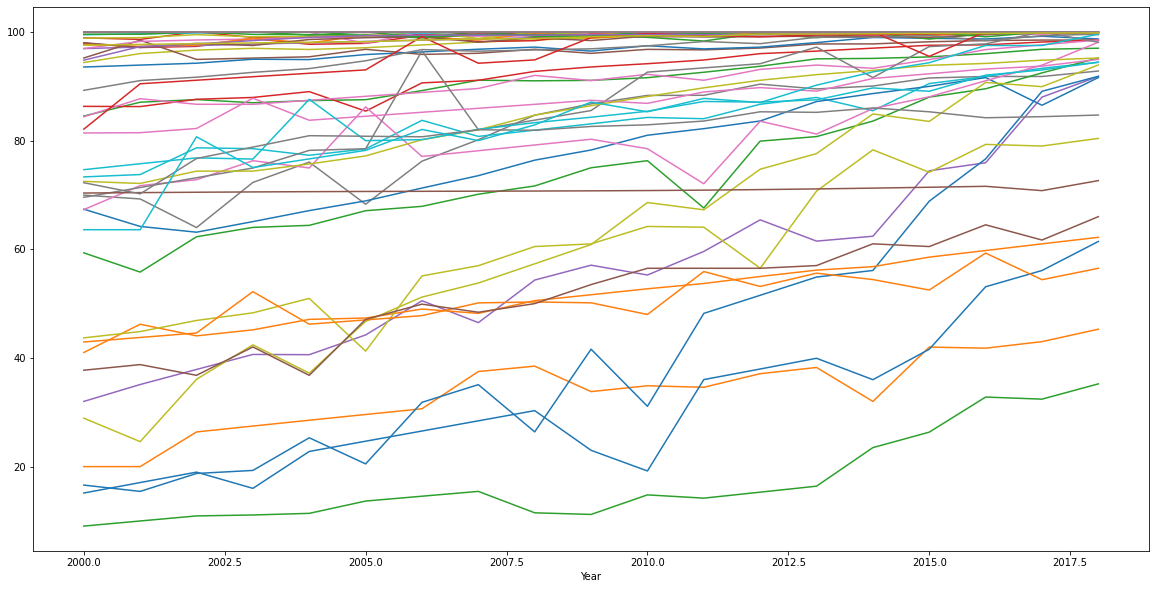

In [ ]:
pivoted.plot(legend=False, figsize=(20, 10))

In [ ]:
pivoted.mean()

Country Name
Albania            99.979474
Angola             33.754840
Australia         100.000000
Azerbaijan         99.653992
Bangladesh         56.485728
                     ...    
Tunisia            99.052632
Ukraine            99.976476
United Kingdom    100.000000
United States     100.000000
Uruguay            98.883965
Length: 79, dtype: float64

<AxesSubplot:>

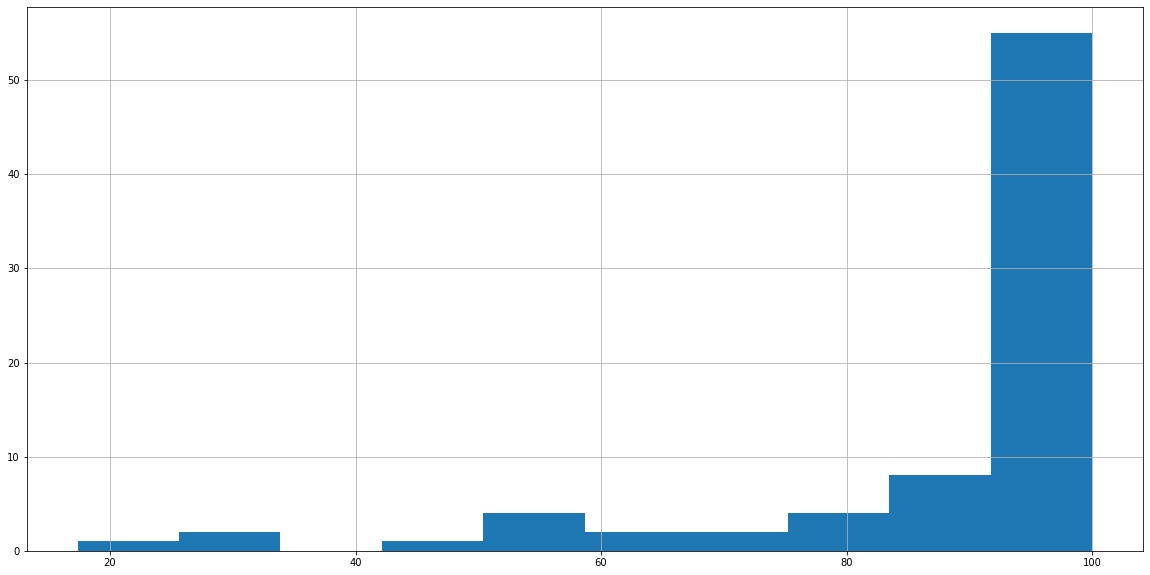

In [ ]:
pivoted.mean().hist(figsize=(20, 10))

In [ ]:
pivoted.std()

Country Name
Albania            0.040204
Angola             7.267095
Australia          0.000000
Azerbaijan         0.450525
Bangladesh        17.139370
                    ...    
Tunisia            1.256701
Ukraine            0.057803
United Kingdom     0.000000
United States      0.000000
Uruguay            0.793574
Length: 79, dtype: float64

<AxesSubplot:>

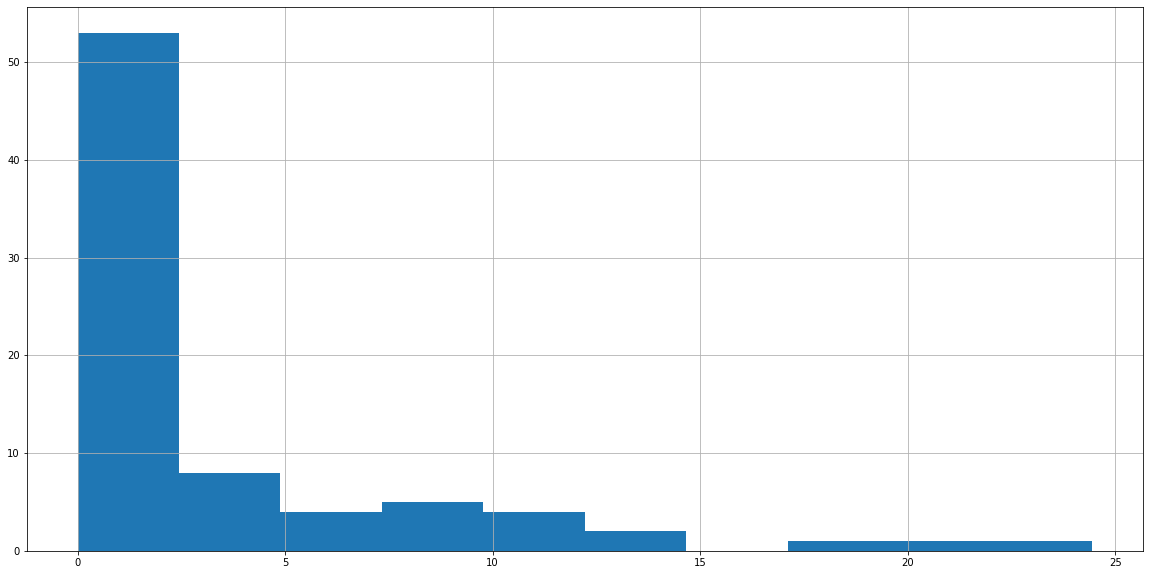

In [ ]:
pivoted.std().hist(figsize=(20, 10))

In [ ]:
pivoted.median()

Country Name
Albania           100.00
Angola             34.60
Australia         100.00
Azerbaijan         99.90
Bangladesh         55.26
                   ...  
Tunisia            99.50
Ukraine           100.00
United Kingdom    100.00
United States     100.00
Uruguay            99.10
Length: 79, dtype: float64

<AxesSubplot:title={'center':'Some title'}, ylabel='Frequency'>

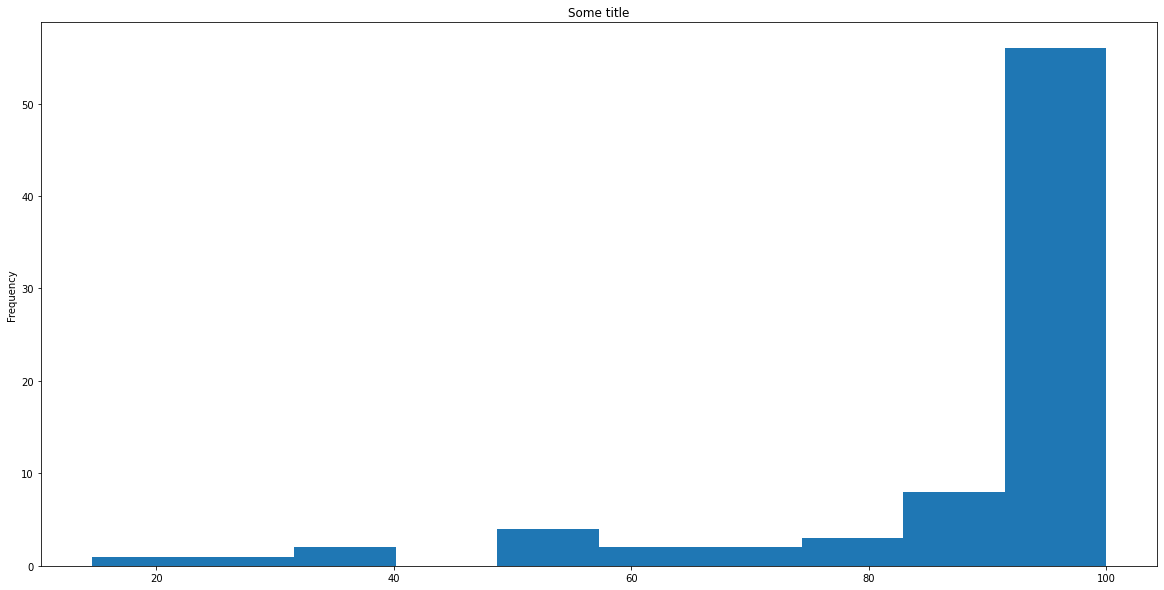

In [ ]:
pivoted.median().plot(kind="hist", title="Some title", figsize=(20, 10))

<AxesSubplot:title={'center':'Increase from the first value'}, xlabel='Year'>

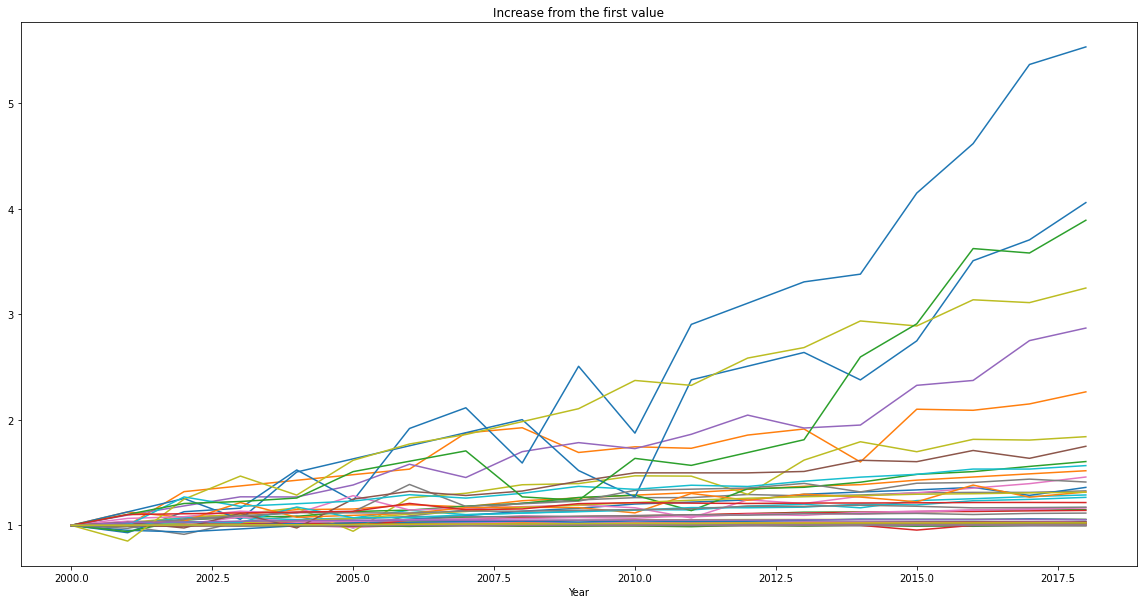

In [ ]:
pivoted.div(pivoted.iloc[0]).plot(
    legend=False, figsize=(20, 10), title="Increase from the first value"
)

<AxesSubplot:ylabel='Frequency'>

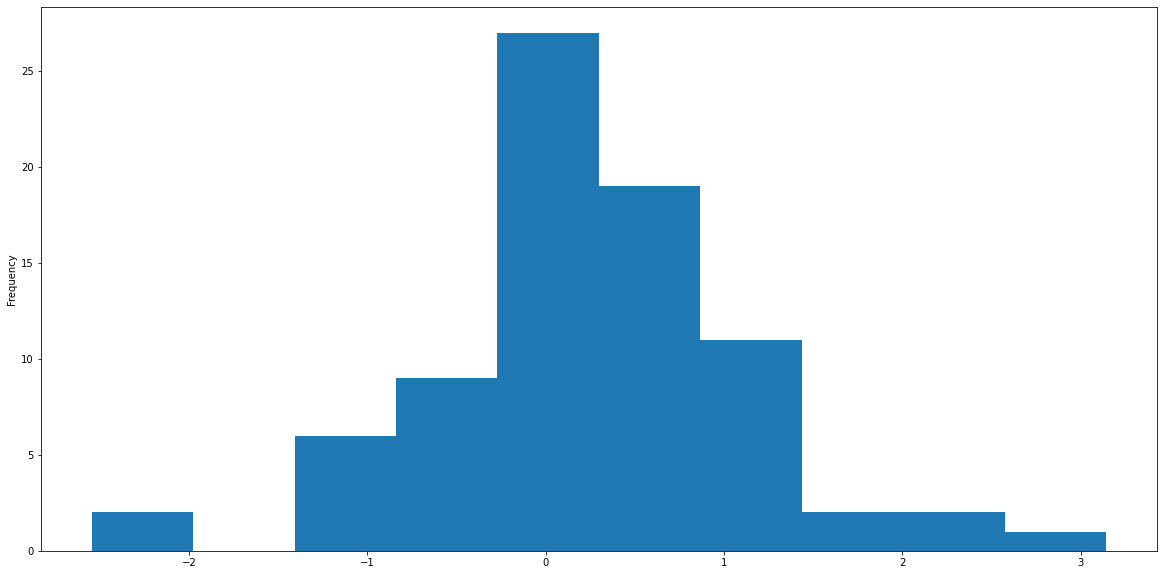

In [ ]:
pivoted.skew().plot(kind="hist", figsize=(20, 10))

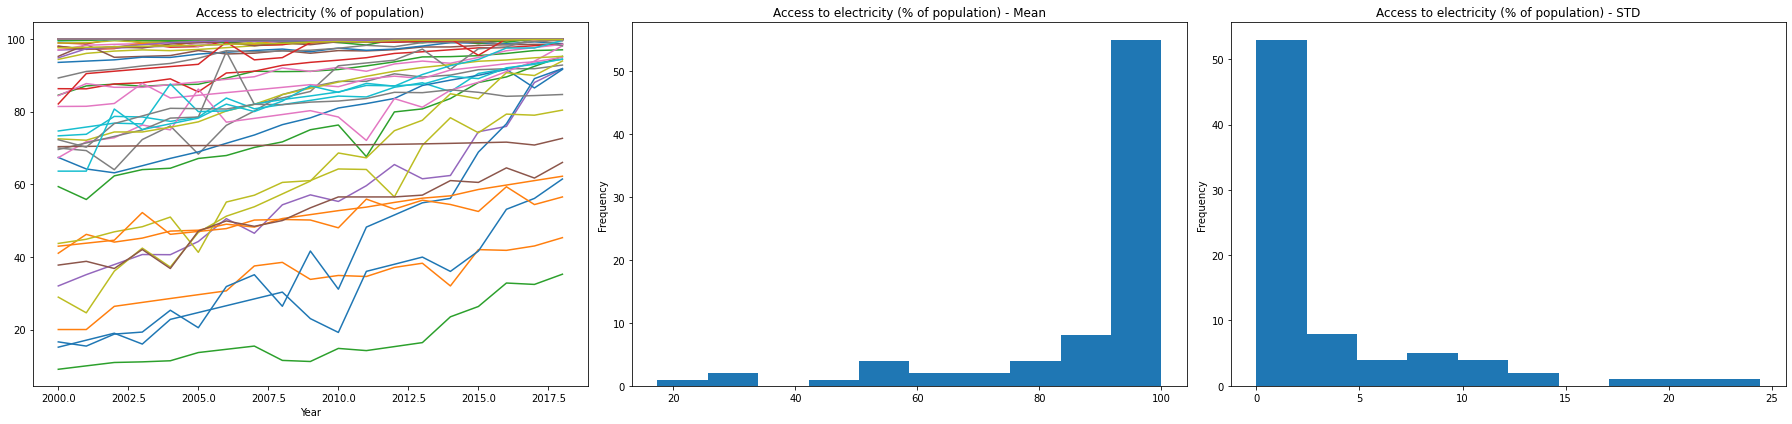

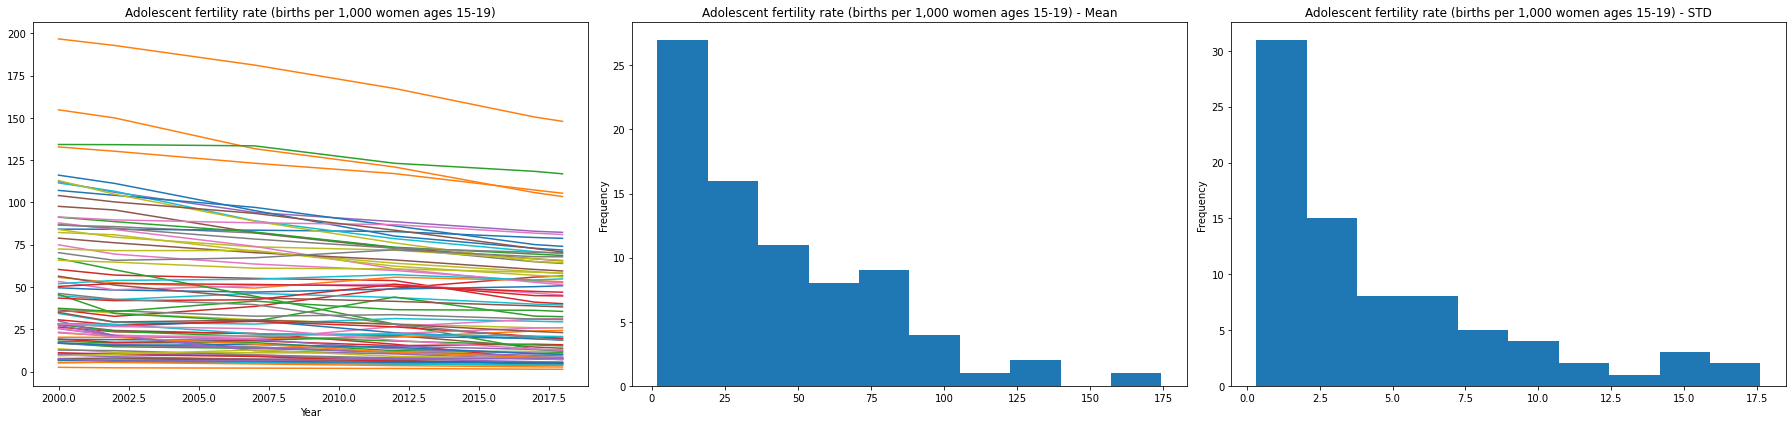

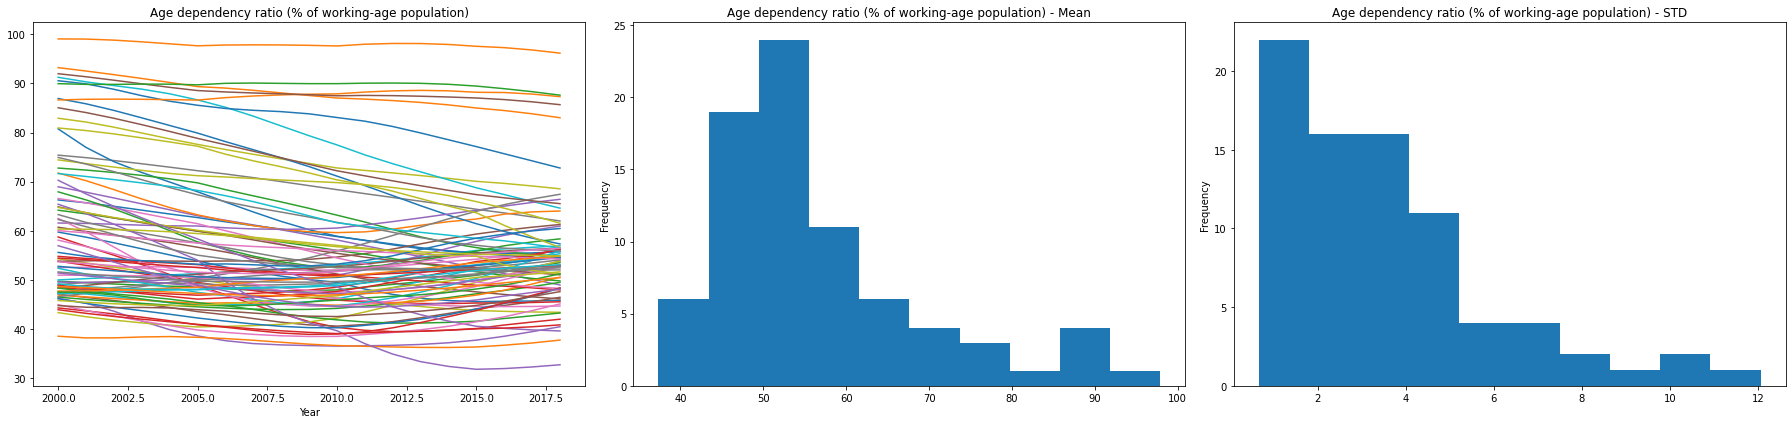

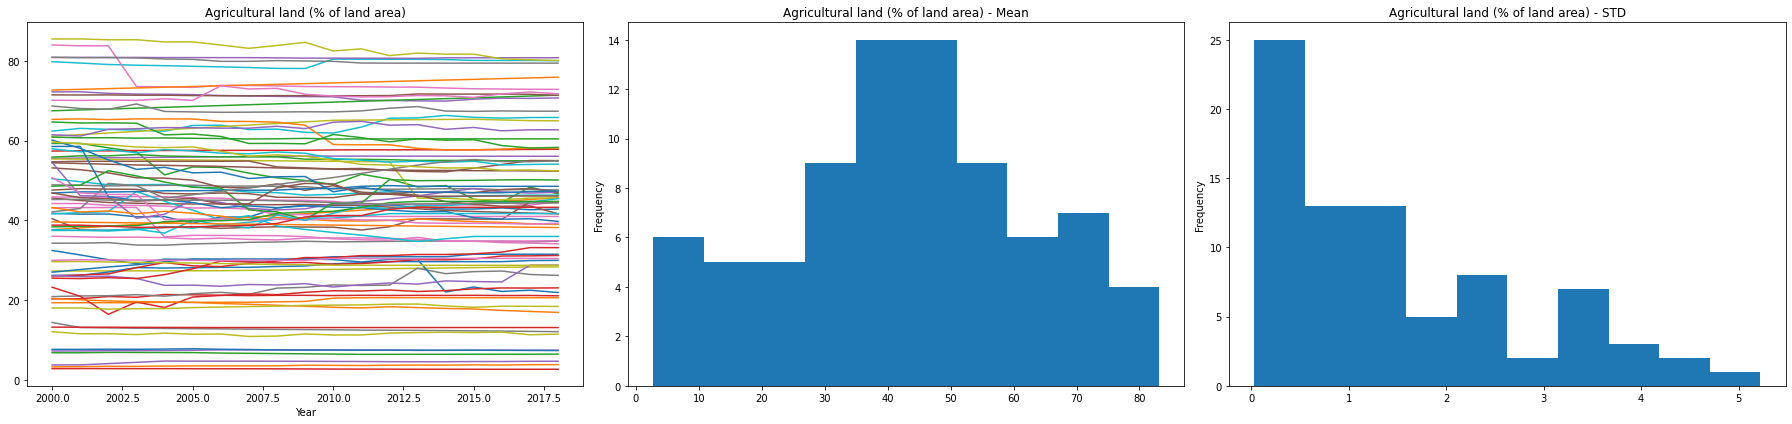

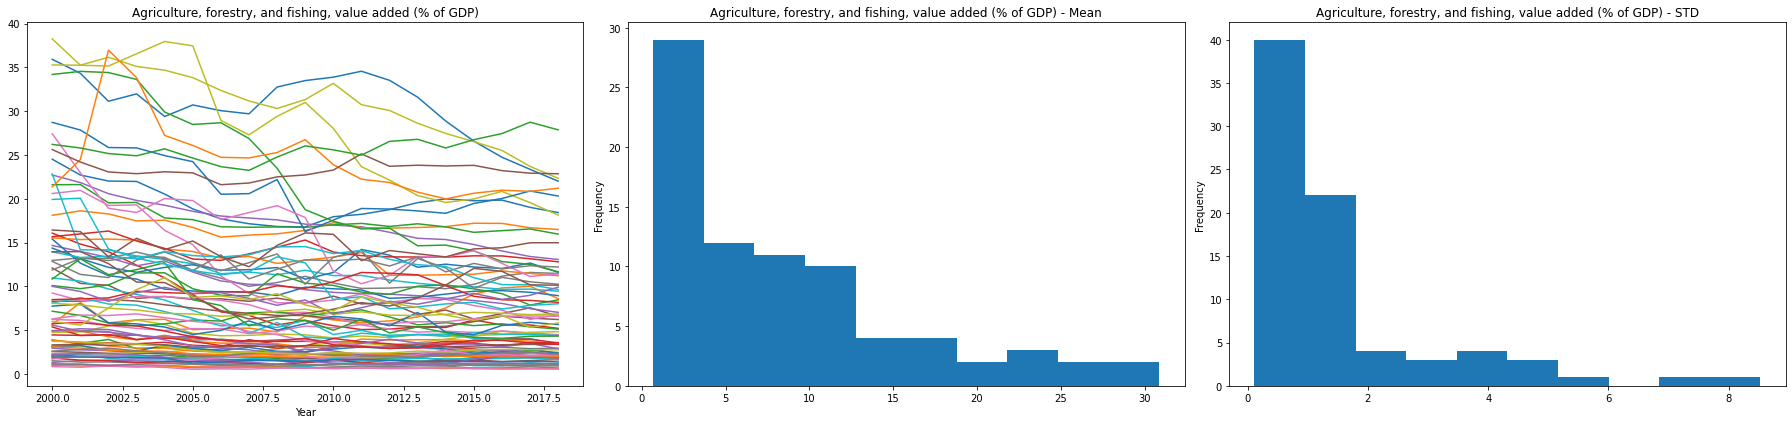

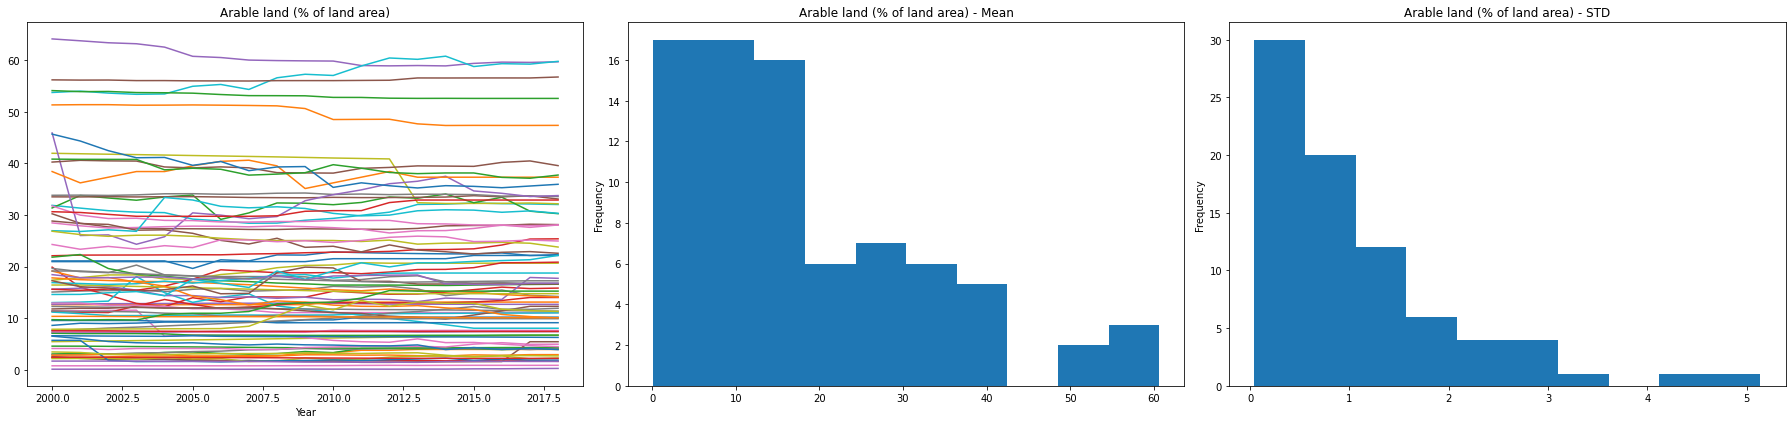

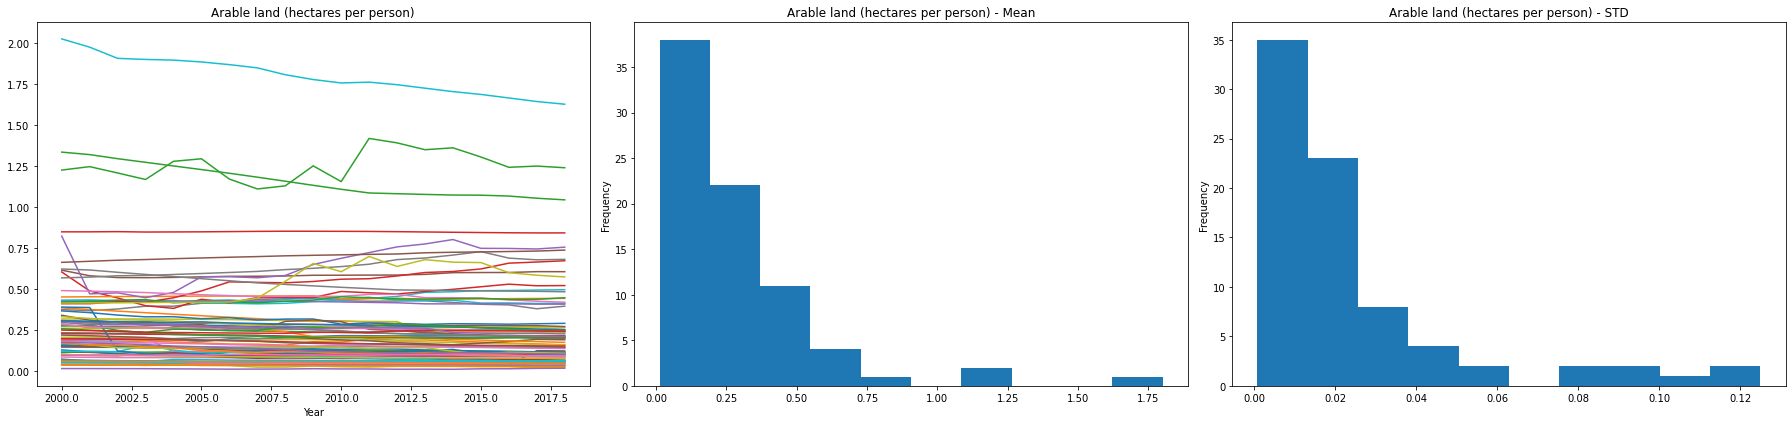

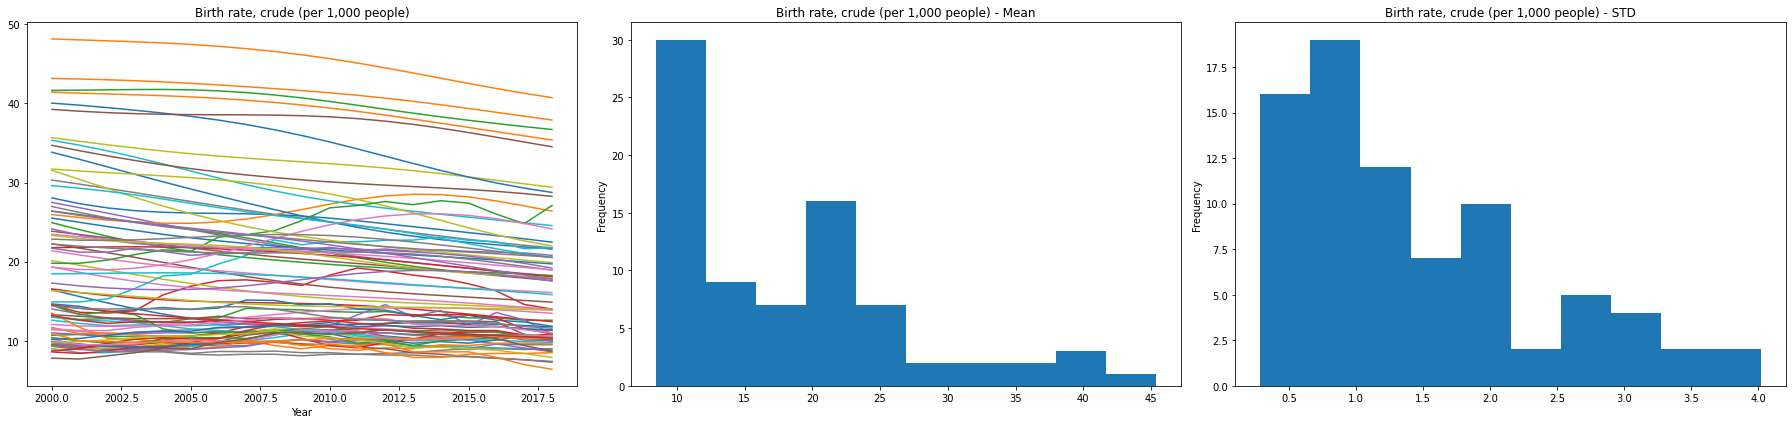

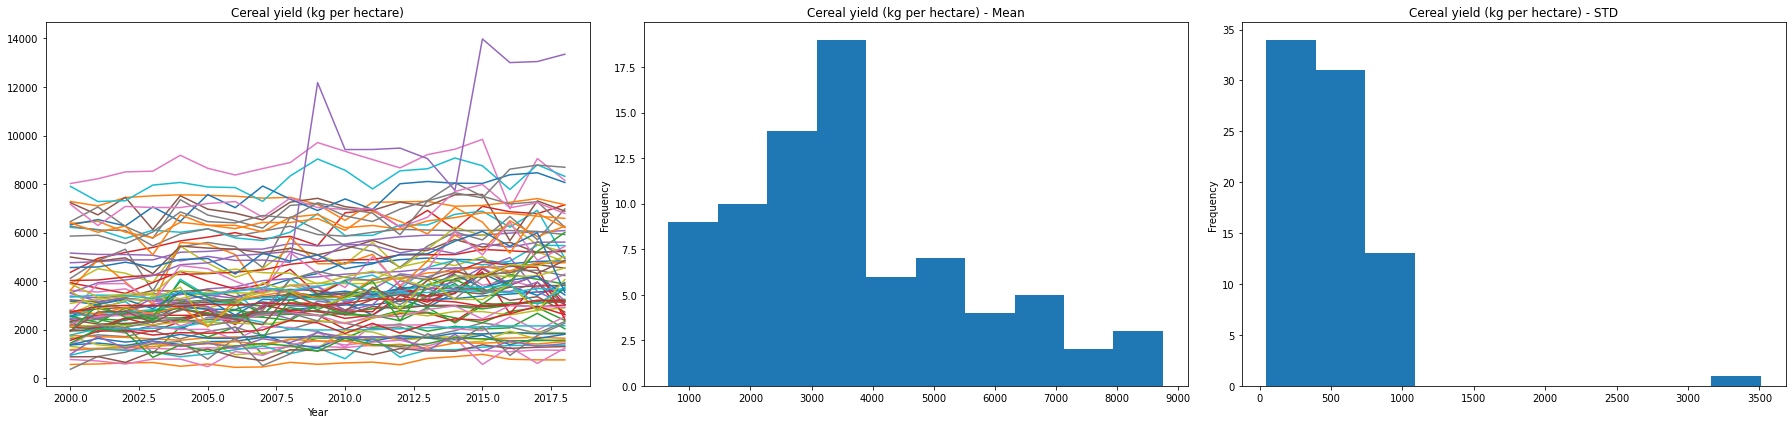

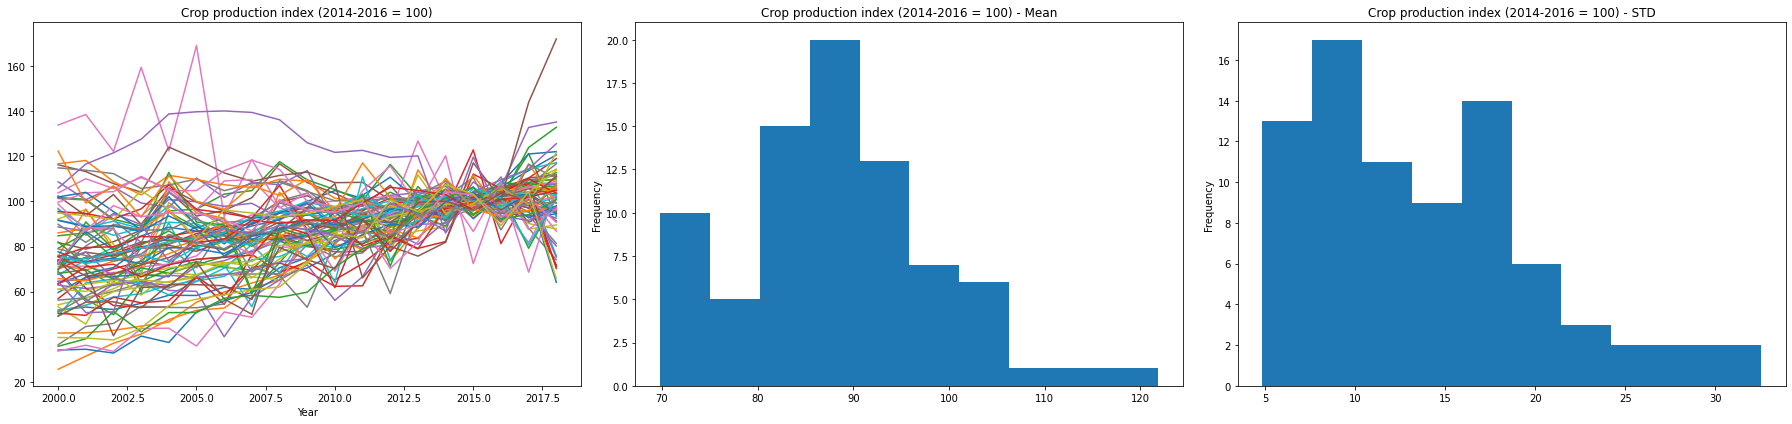

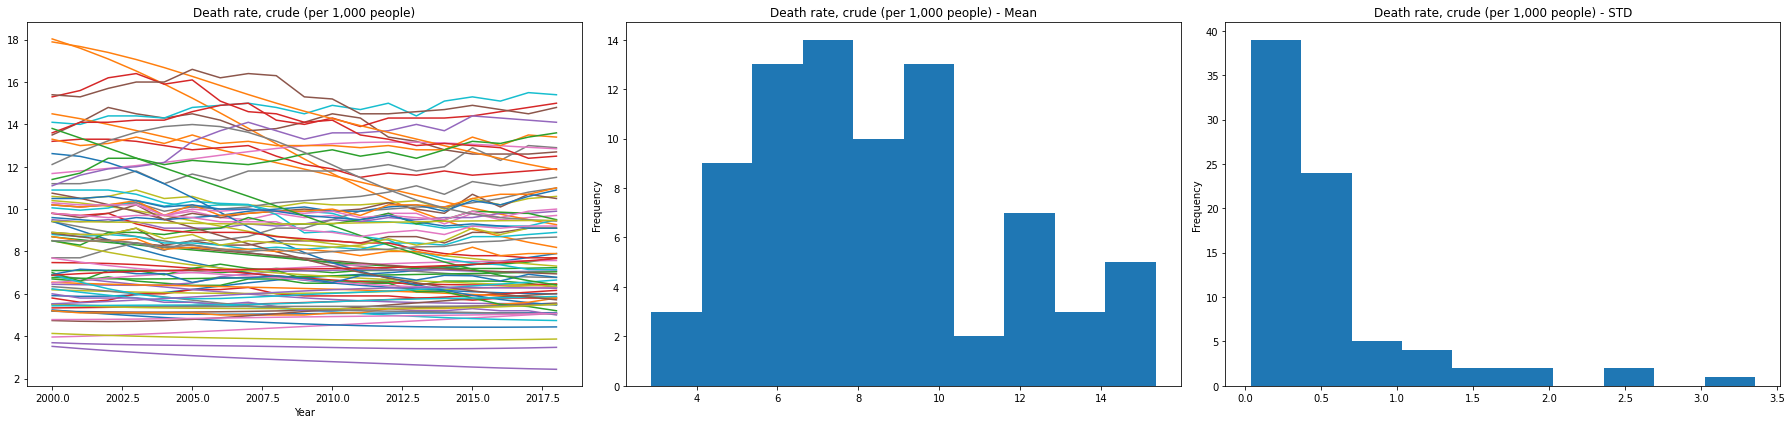

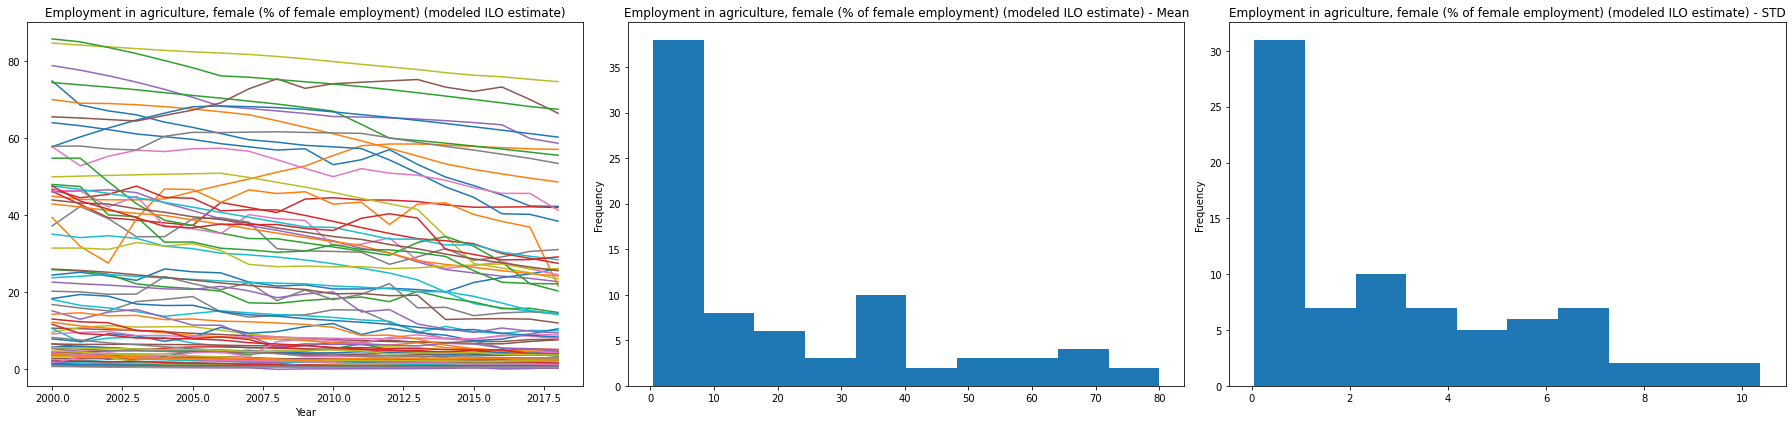

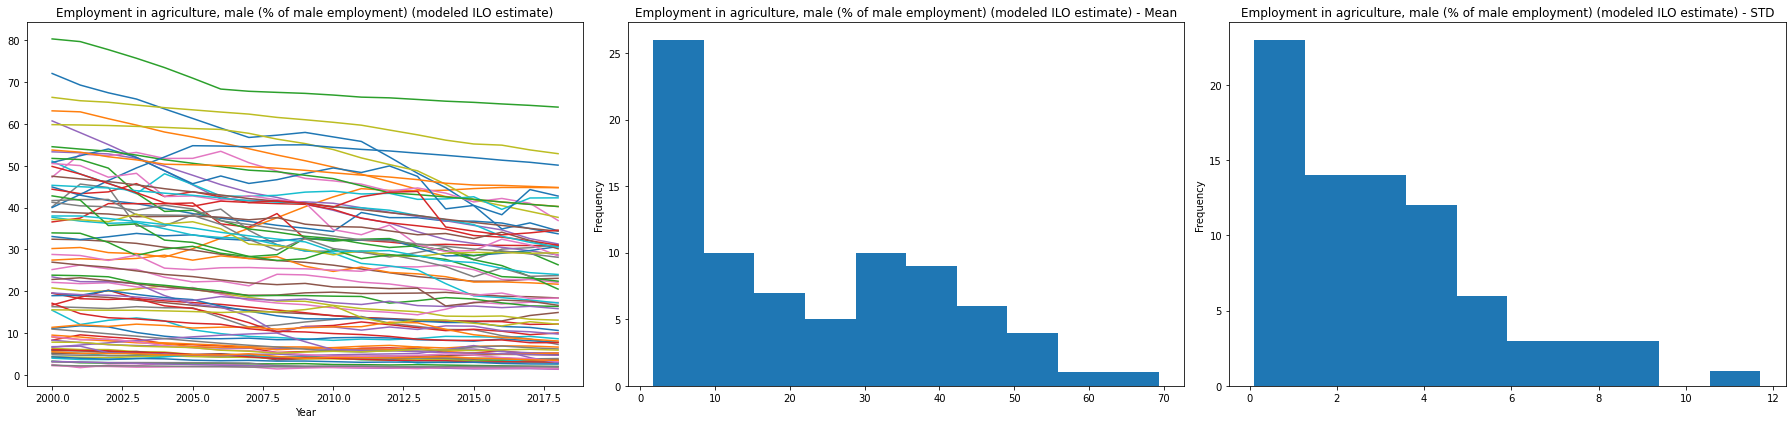

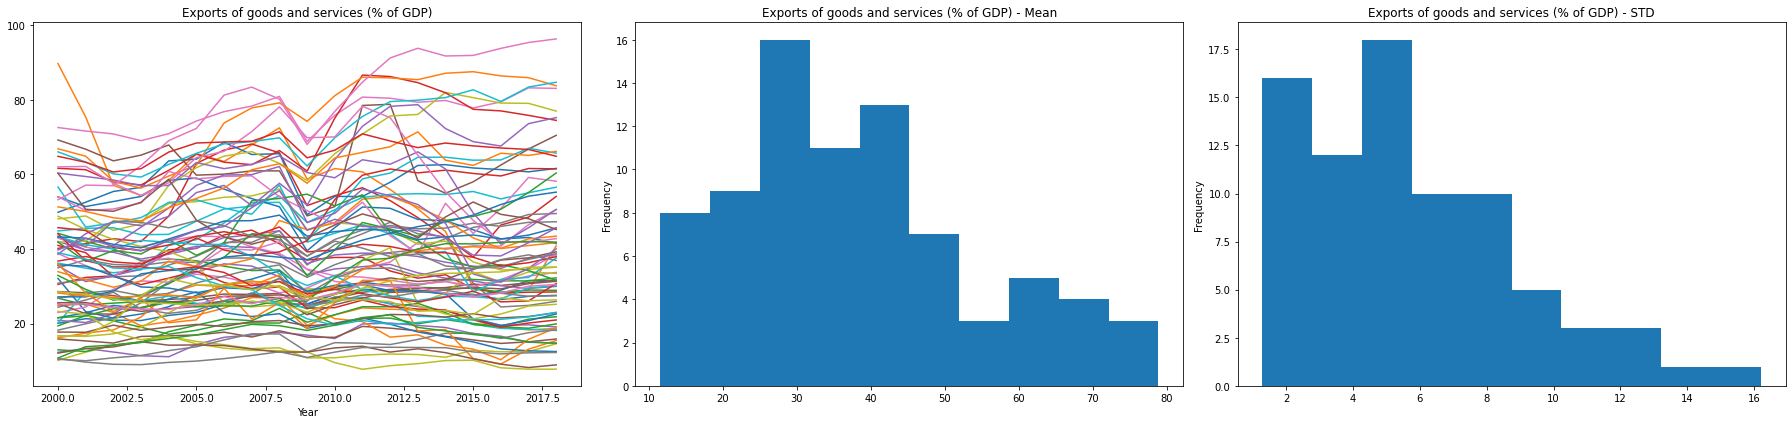

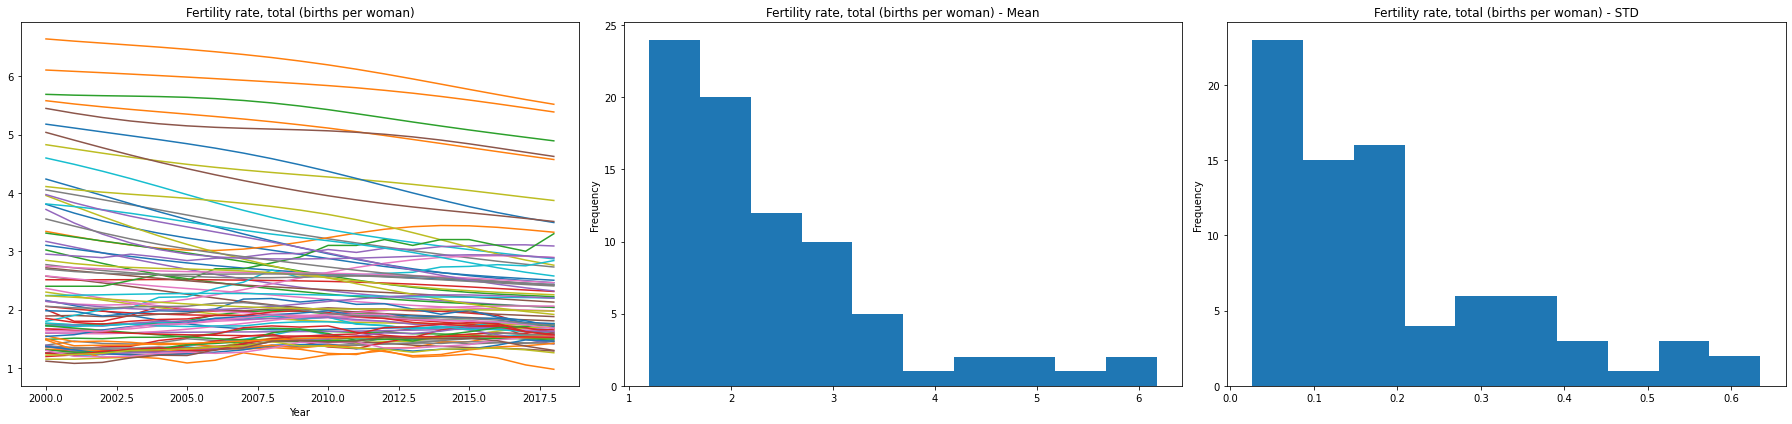

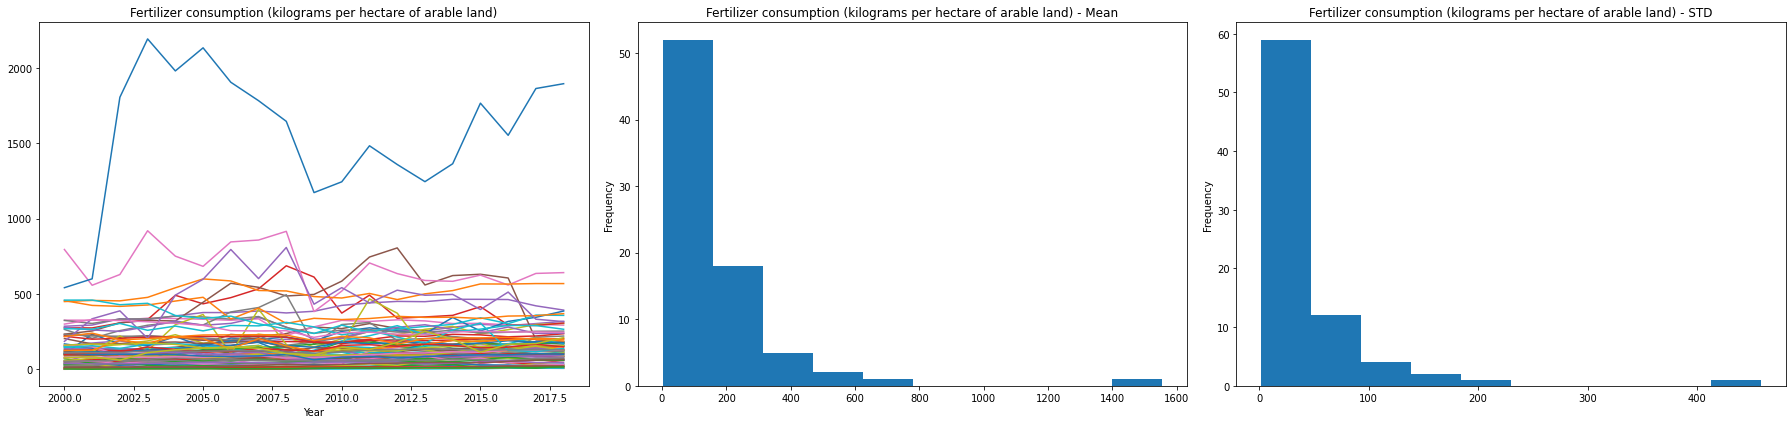

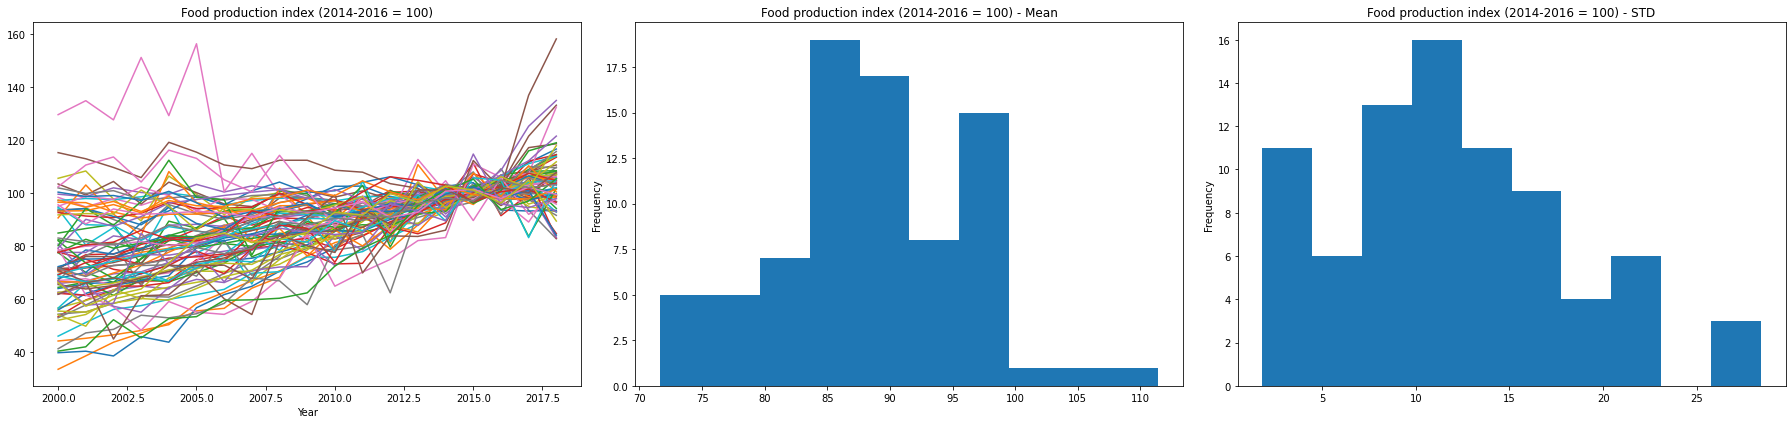

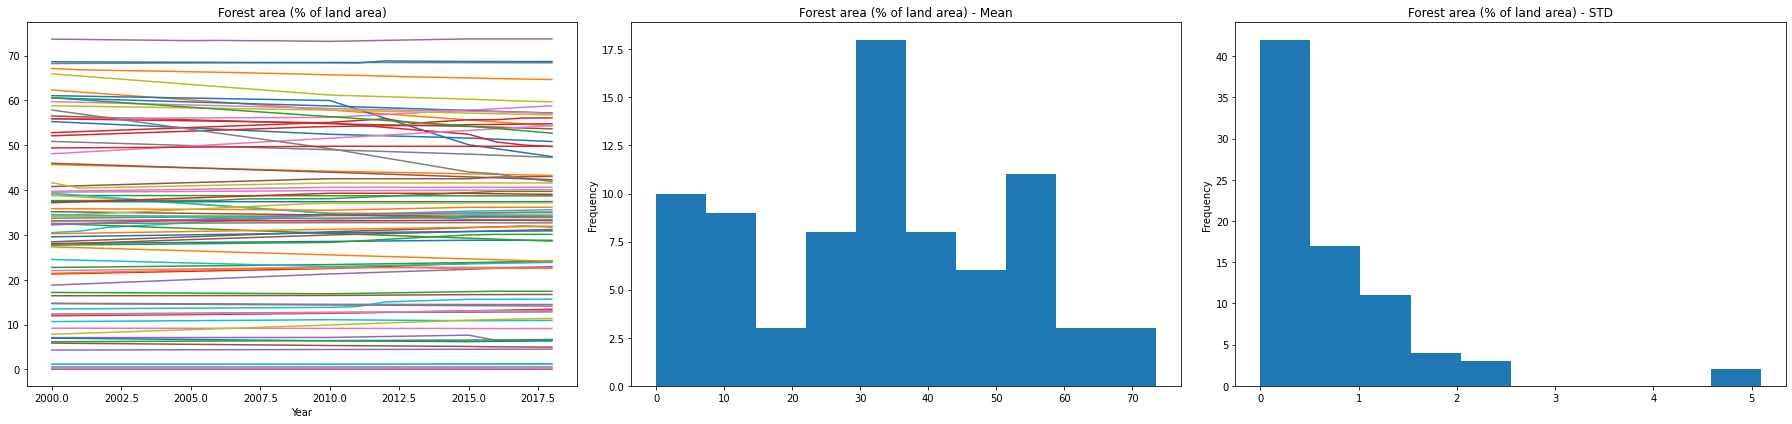

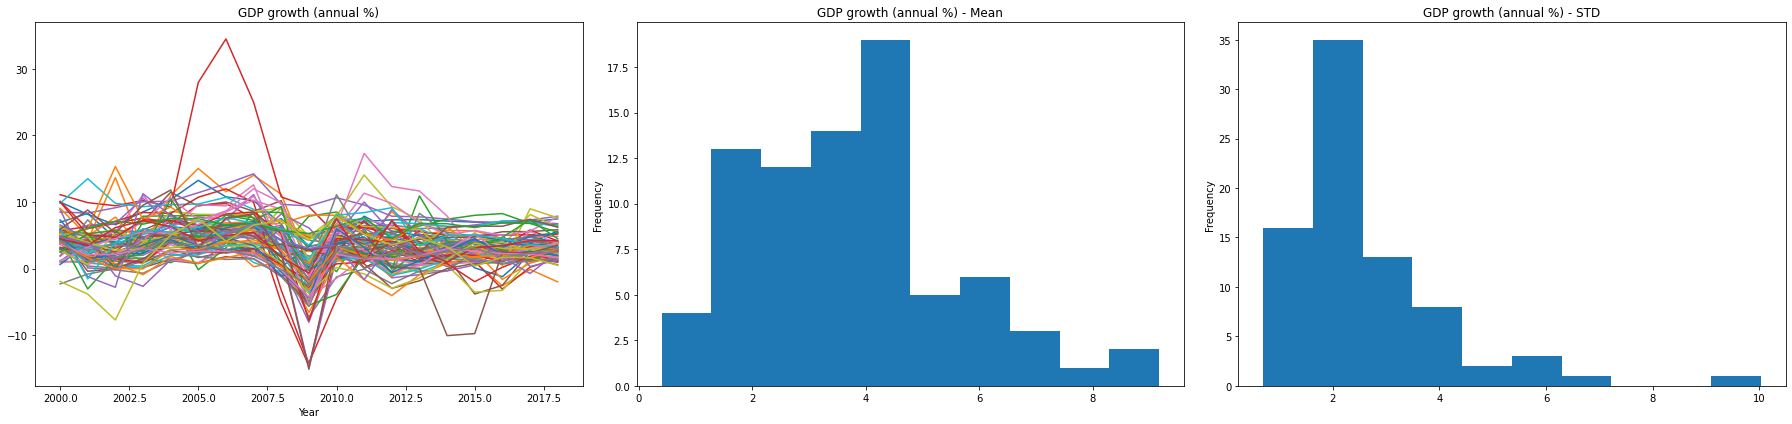

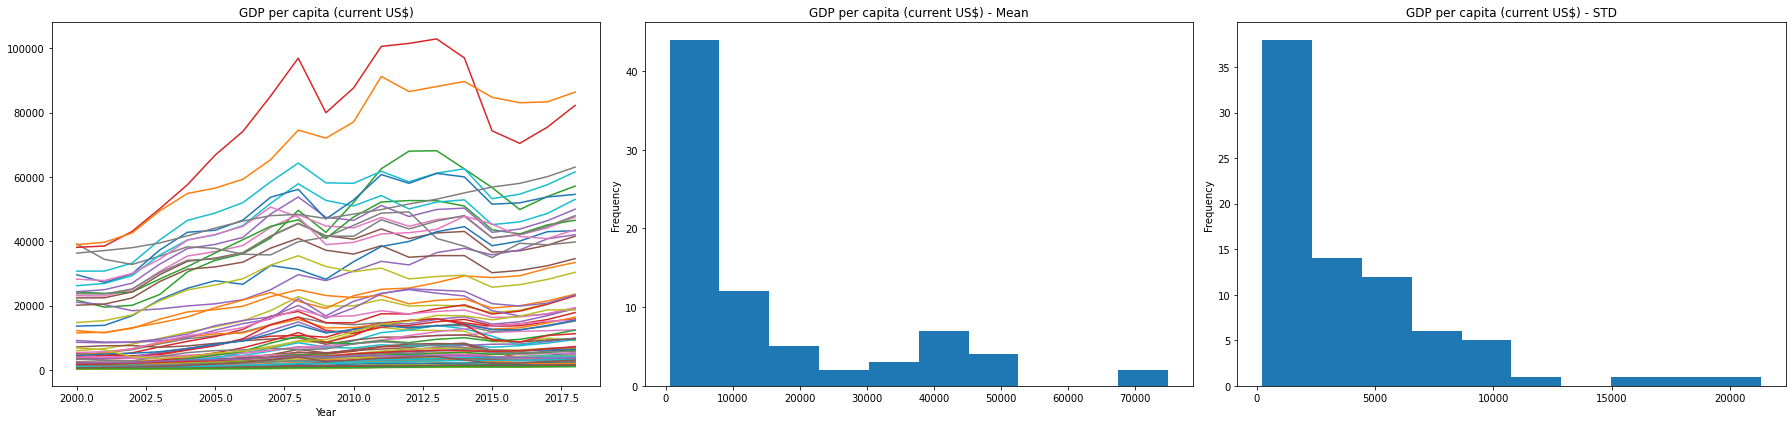

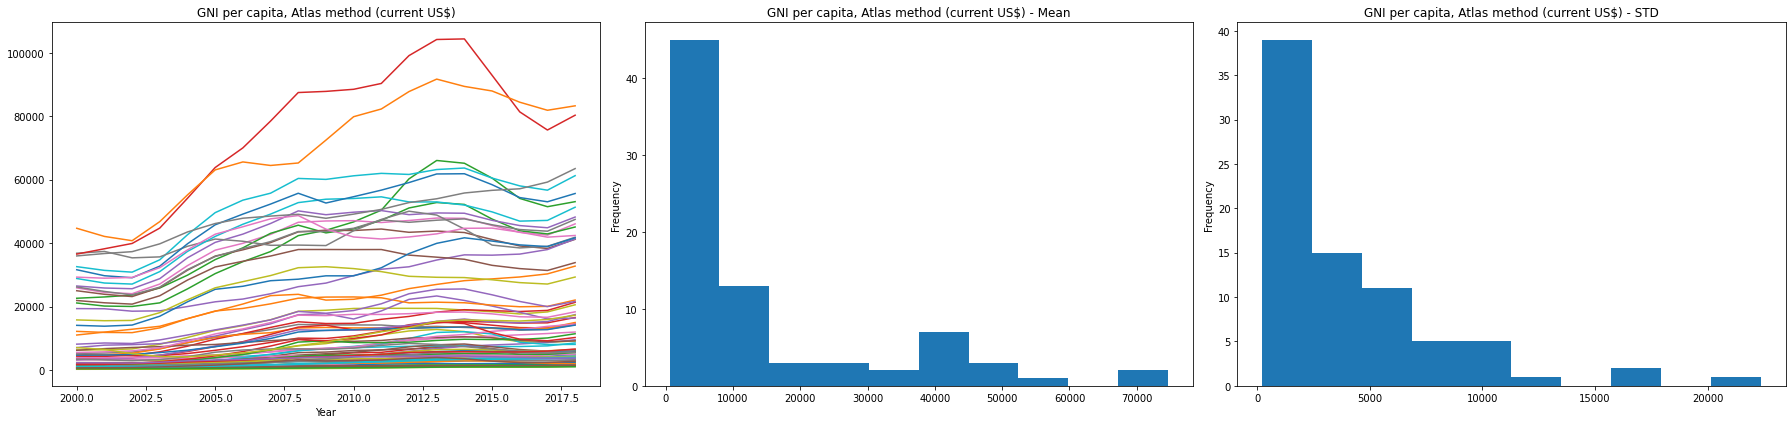

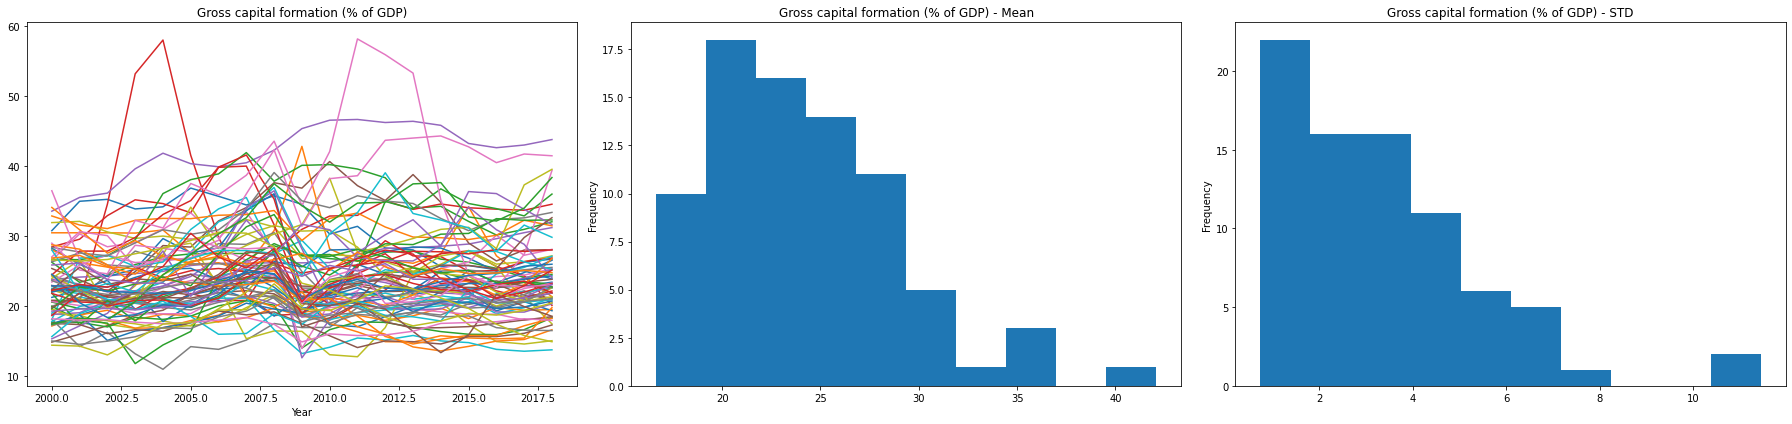

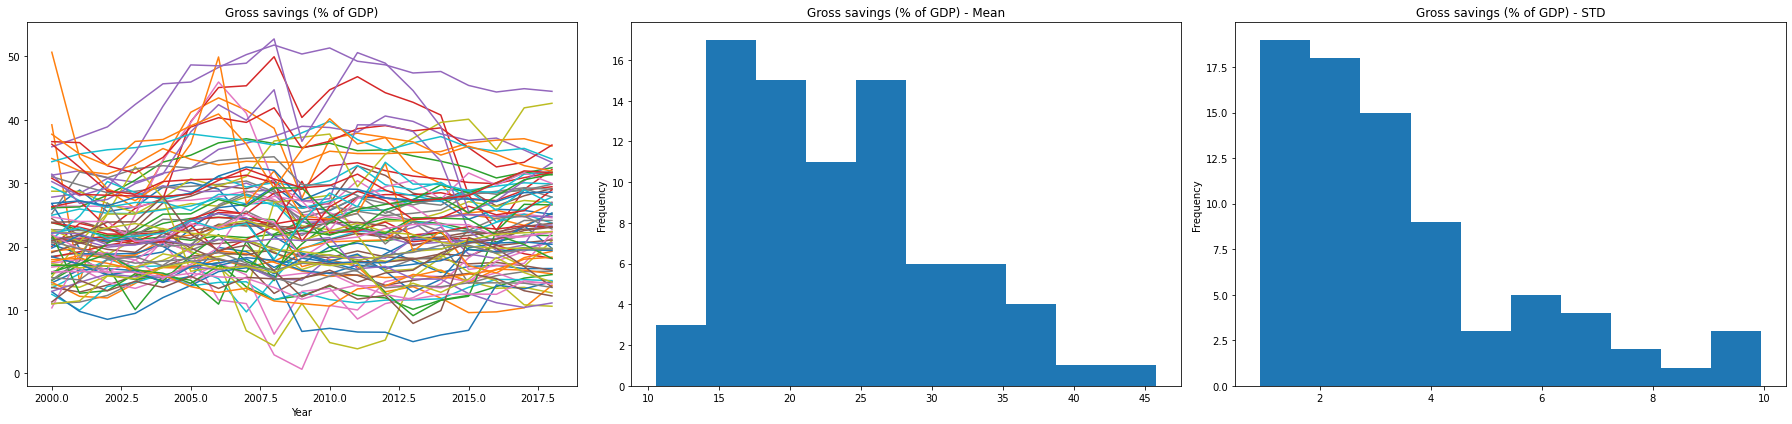

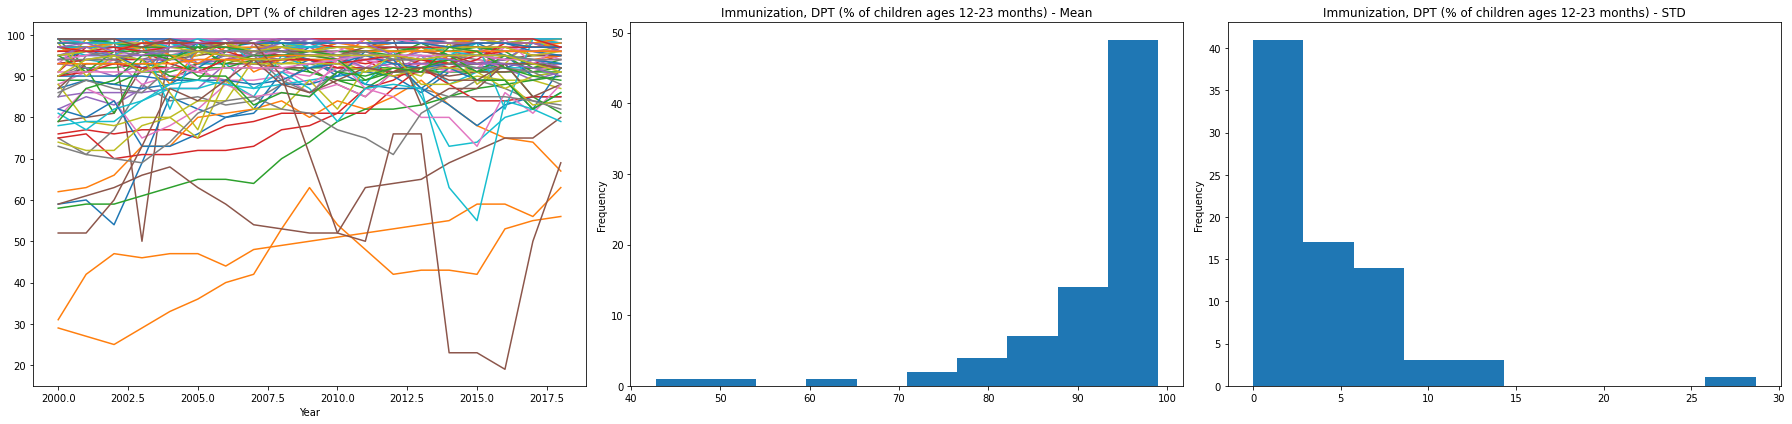

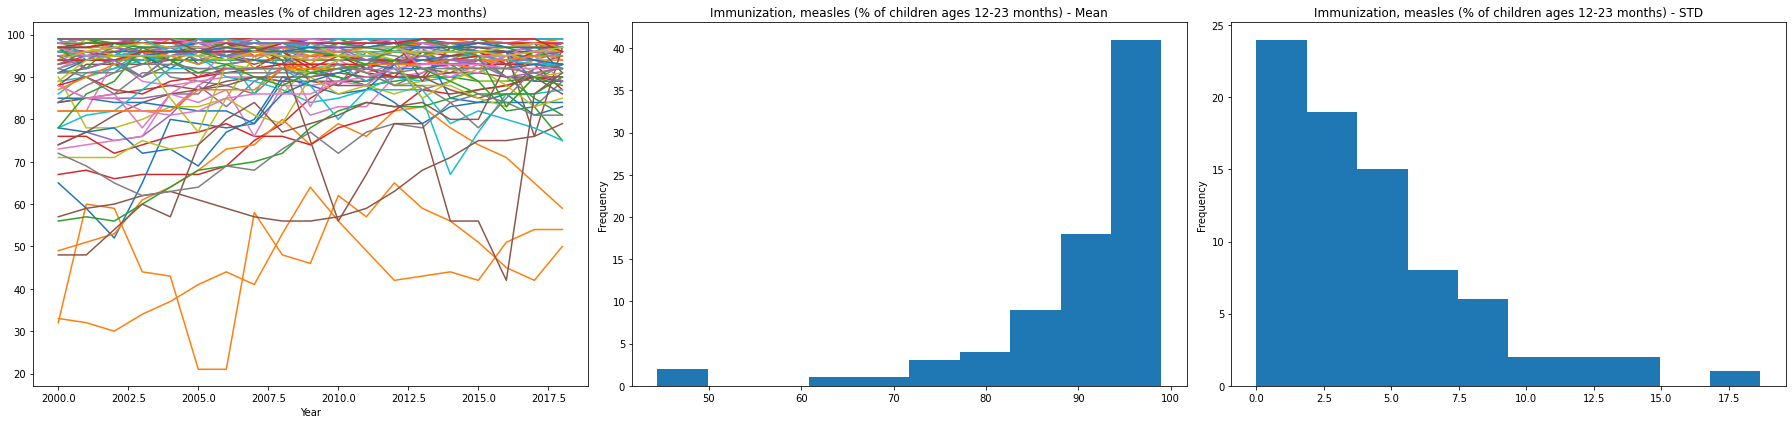

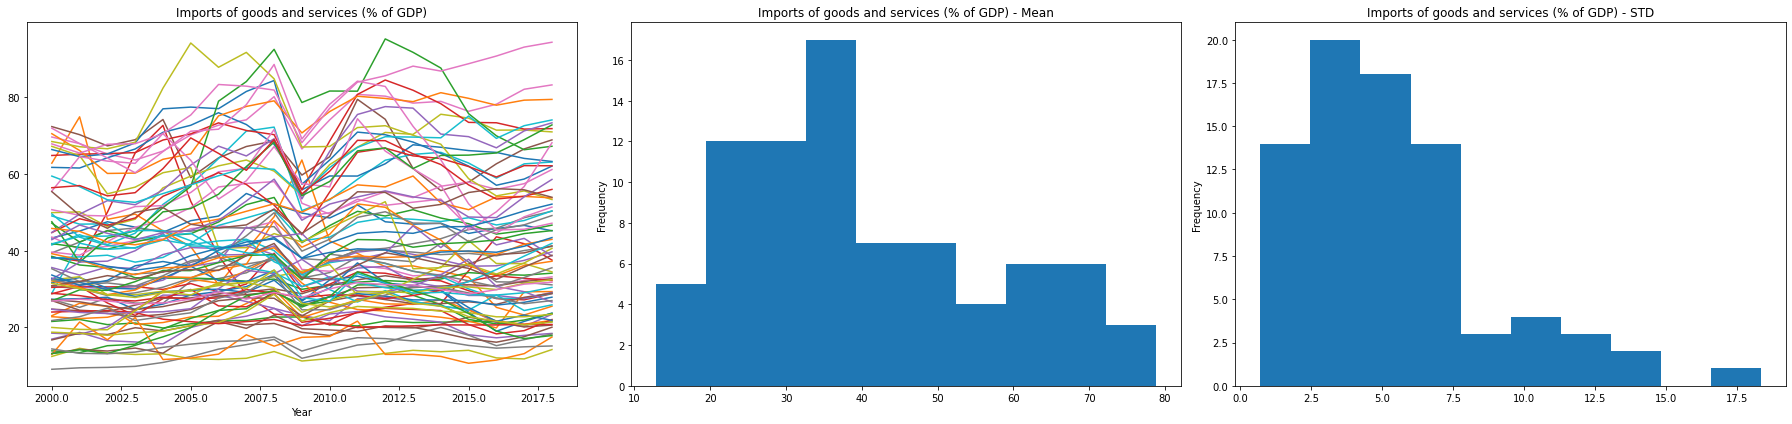

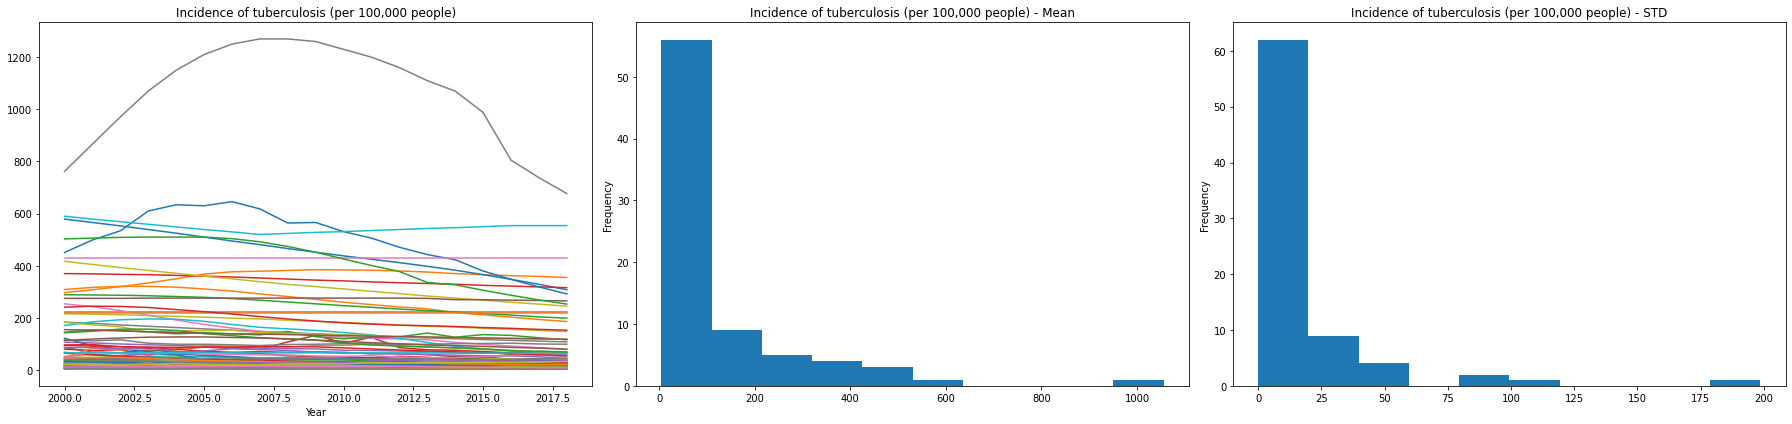

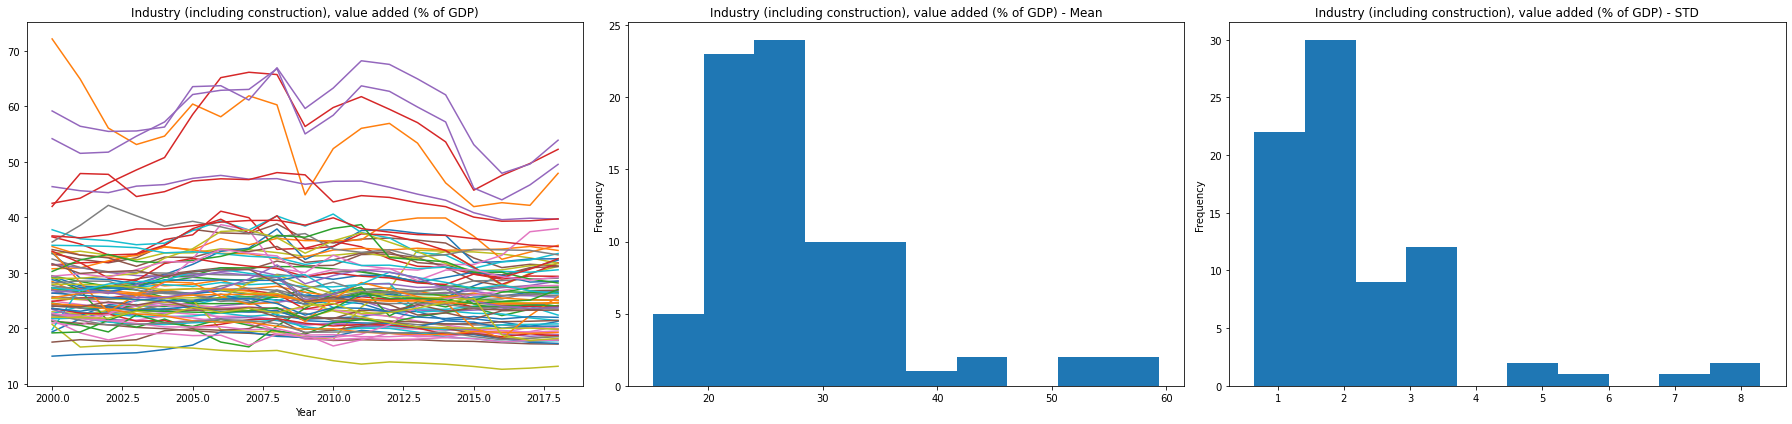

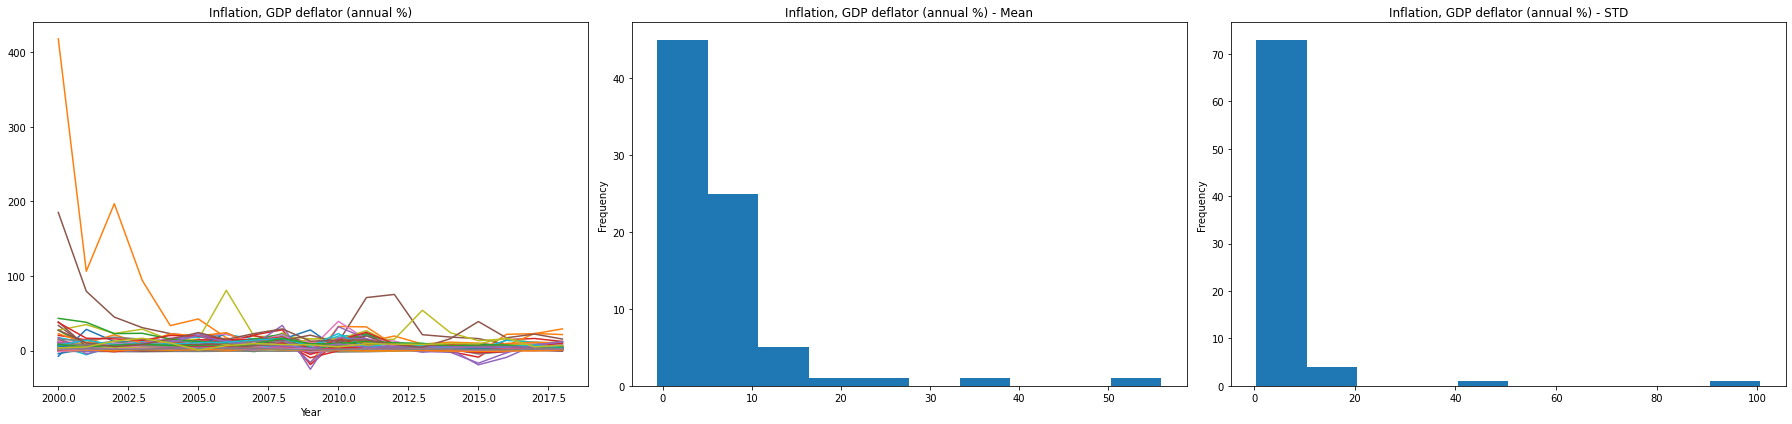

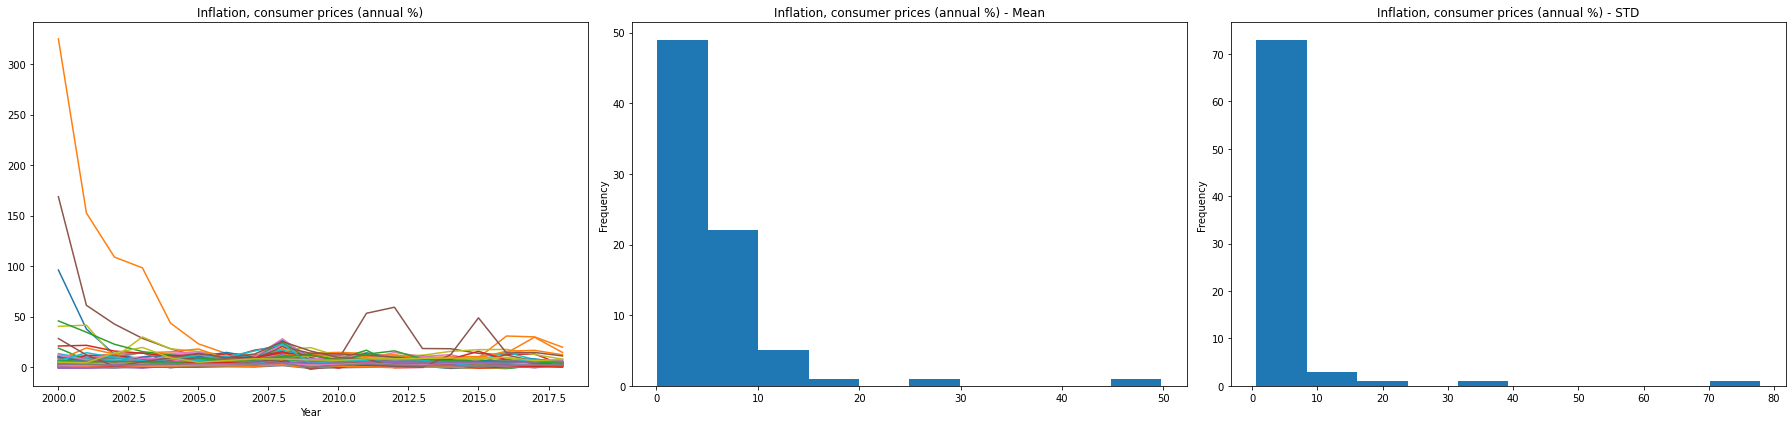

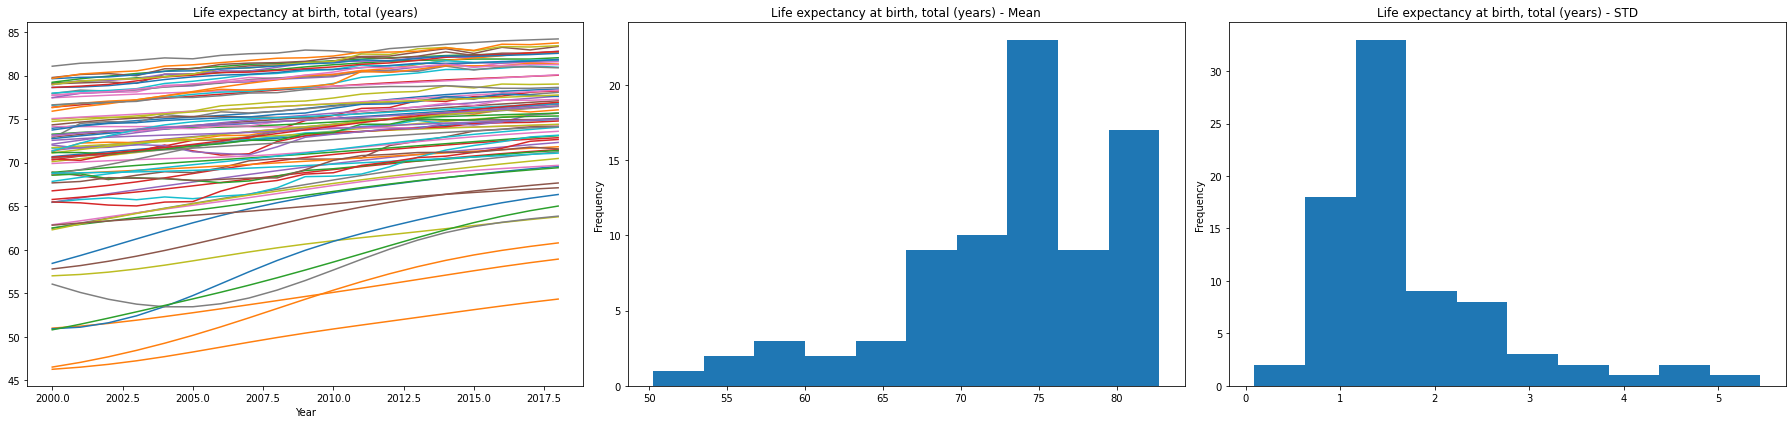

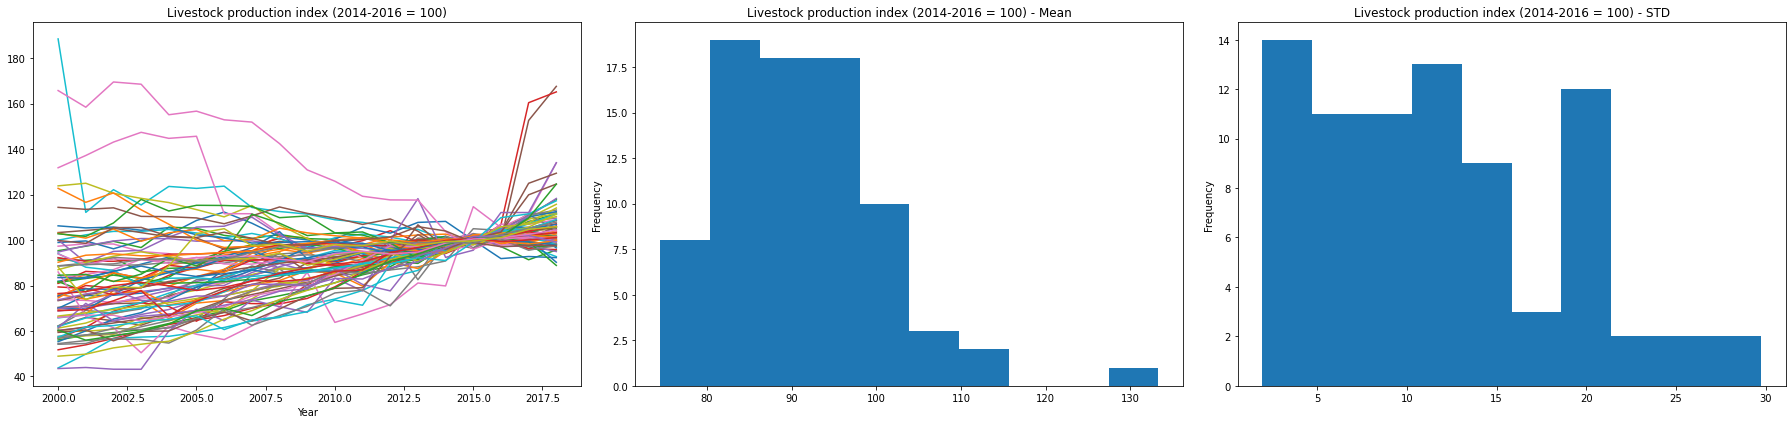

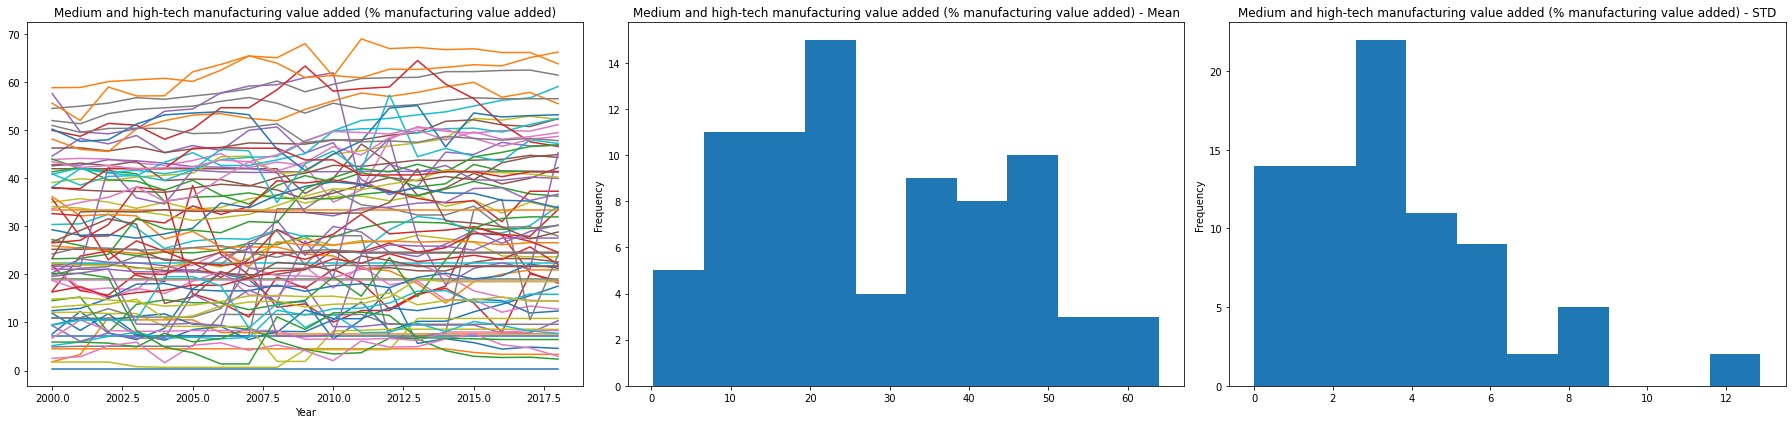

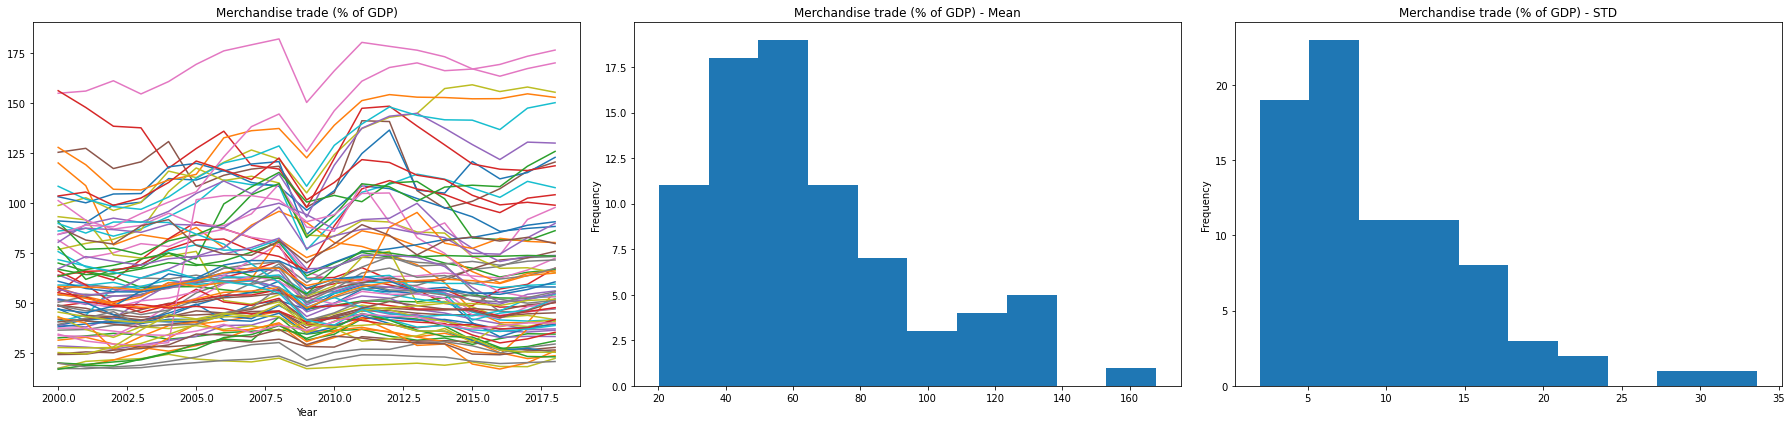

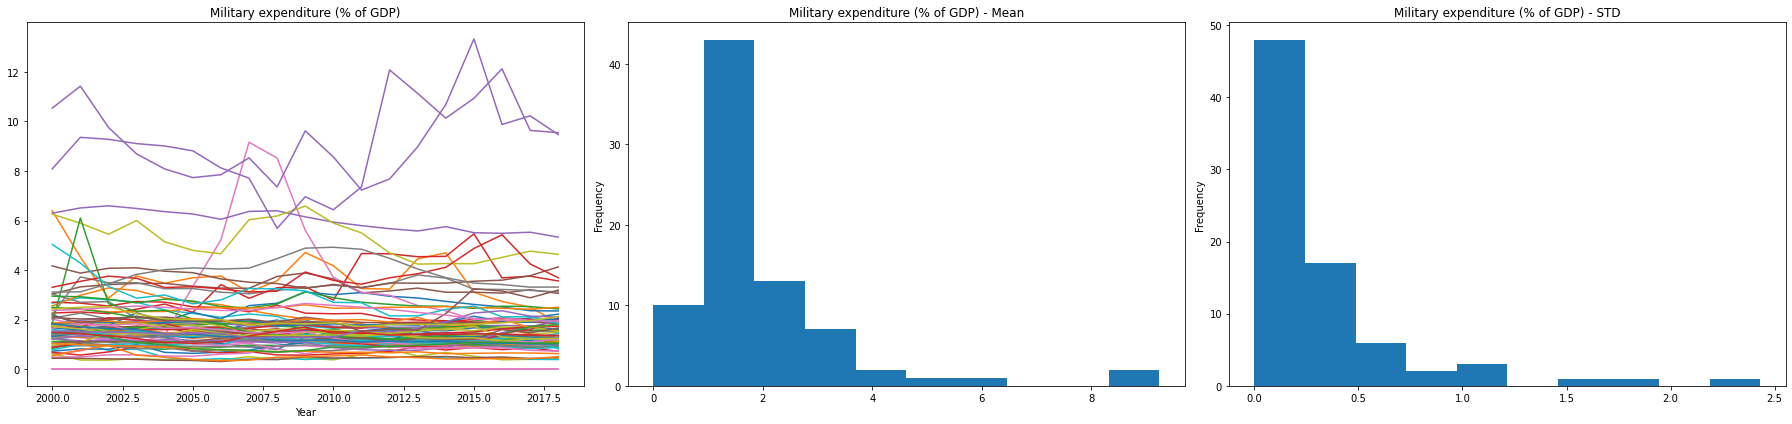

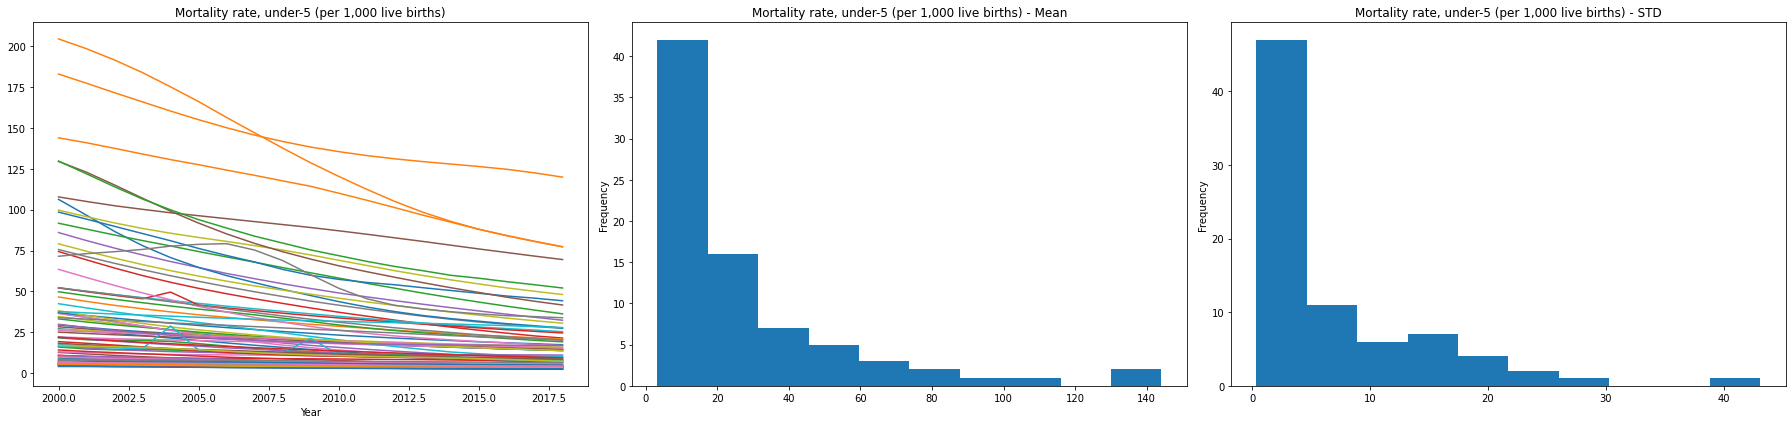

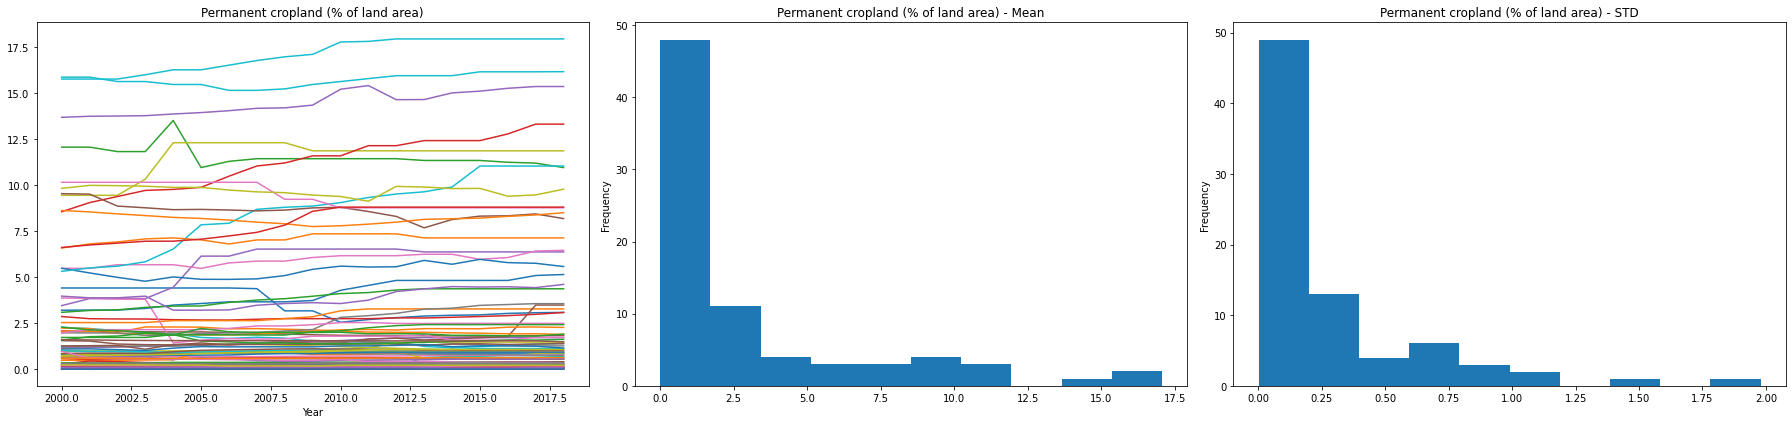

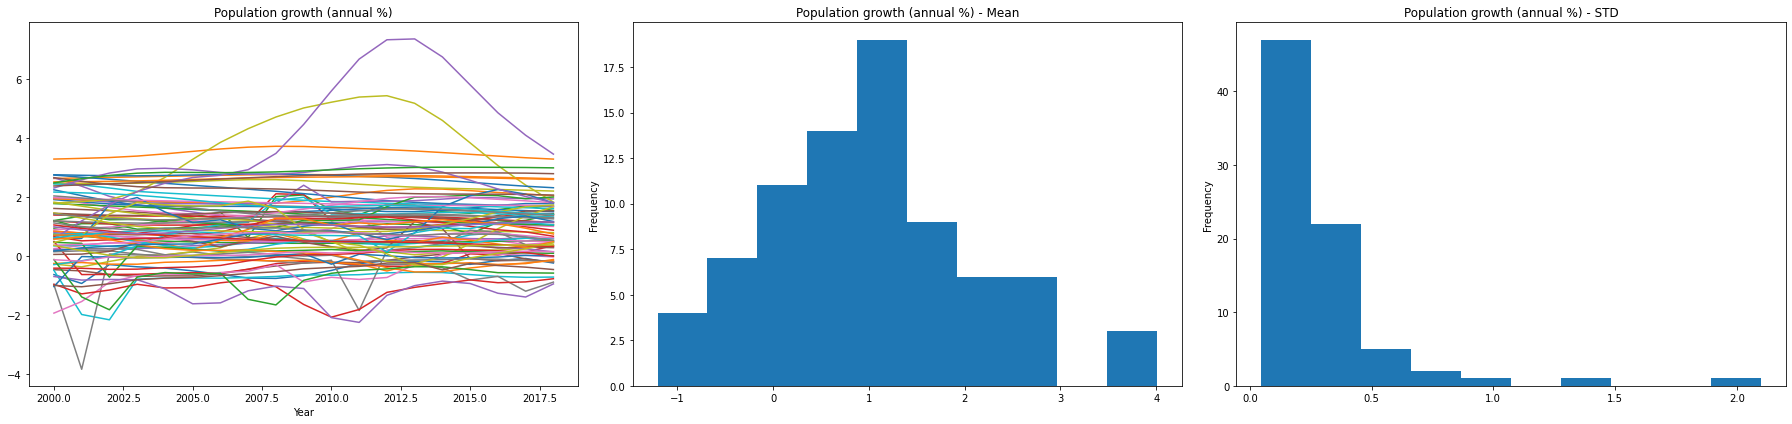

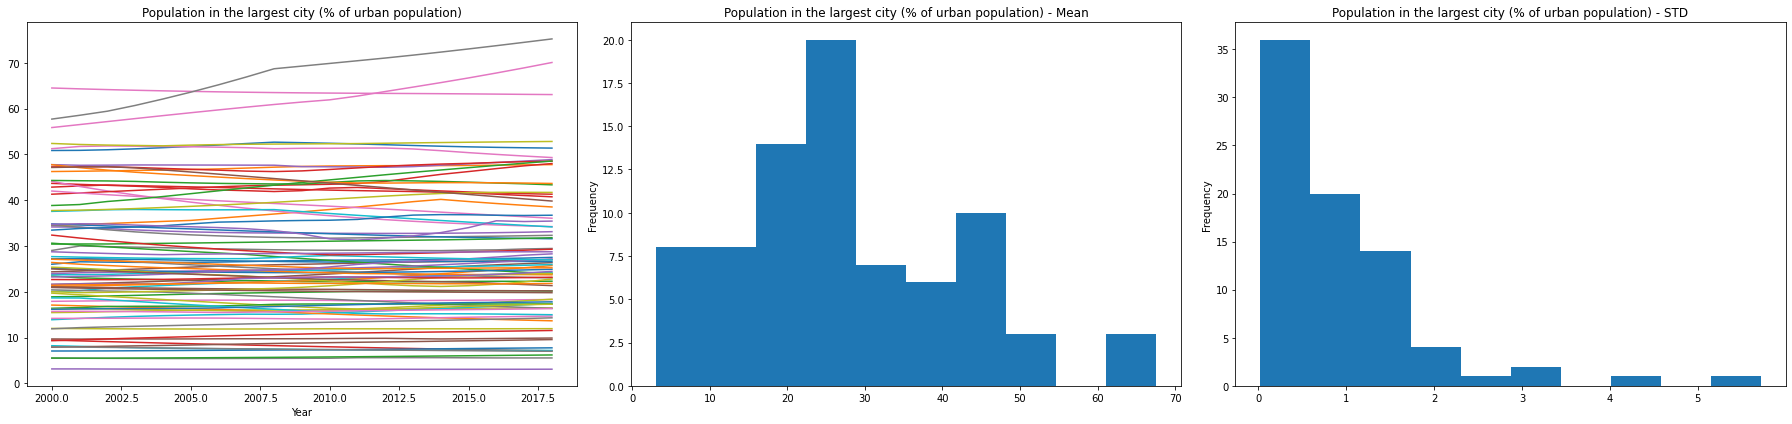

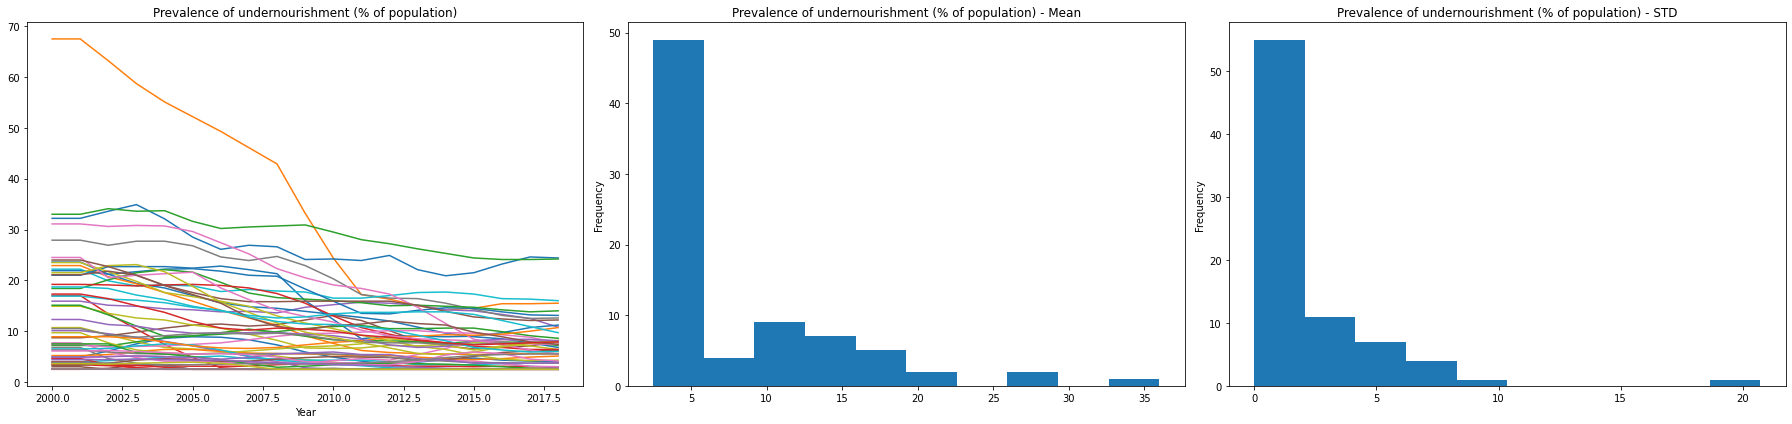

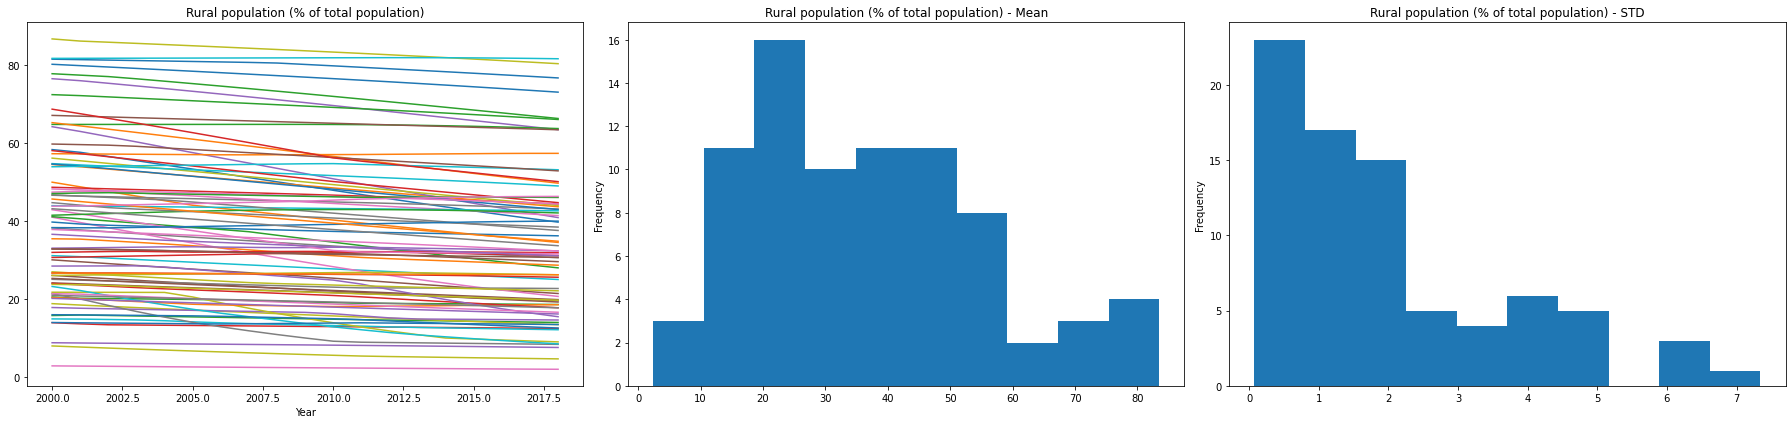

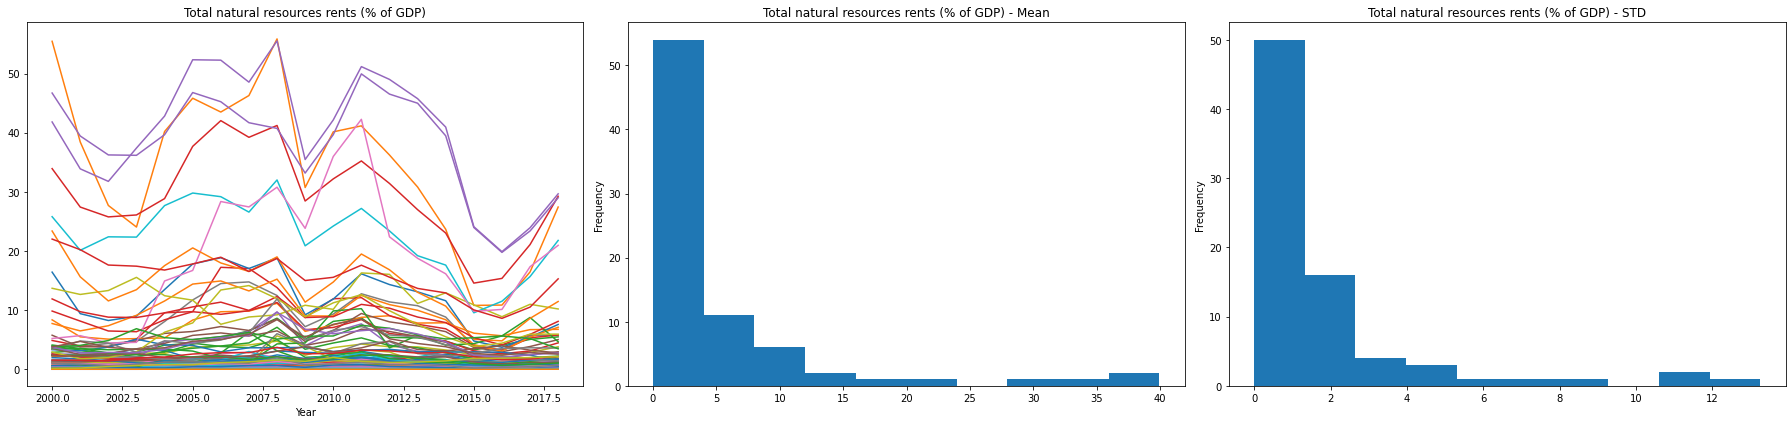

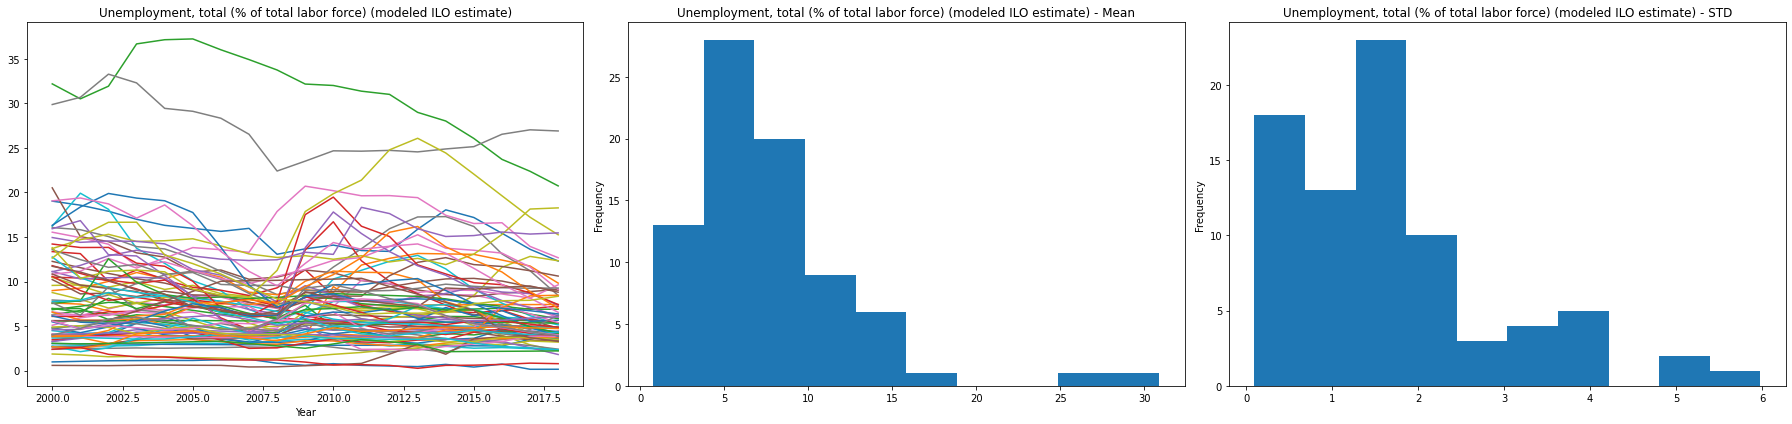

In [ ]:
for indicator in df.columns.values:
    series = df[indicator].to_frame().reset_index()
    pivoted = series.pivot(values=indicator, index="Year", columns="Country Name")
    plot_args = {"kind": "hist"}
    fig, axes = plt.subplots(ncols=3, figsize=(25, 6))
    pivoted.plot(legend=False, title=indicator, ax=axes[0])
    pivoted.mean().plot(**plot_args, title=f"{indicator} - Mean", ax=axes[1])
    pivoted.std().plot(**plot_args, title=f"{indicator} - STD", ax=axes[2])
    # pivoted.median().plot(**plot_args, title=f'{indicator} - Median')
    plt.tight_layout()
    plt.savefig(f"plots/time_series_simple_analysis/{indicator}.pdf")
    plt.show()